## Problem Statement

what should people look out for when investing in housing and where? [The Ames Housing Dataset]

TL;DR
Linear Regression, LASSO and Ridge models will be developed to see which features have the most significant effect on the price of a house.


We will be comparing against the linear regression and the LASSO model of our data to determine which model fared better. A better model is one with lesser features (with high coefficients) and ideally a high R-squared. R-squared can be perceive as the proportion of the variance in the dependent variable that is predictable from the independent variable.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from scipy.stats import skew

In [5]:
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 120)

In [6]:
train = pd.read_csv('../datasets/train.csv')

In [7]:
test = pd.read_csv('../datasets/test.csv')

In [8]:
train_test = pd.concat([train, test], sort=False)
train_test.reset_index(drop=True, inplace=True)

In [9]:
train_test.to_csv('./train_test.csv')

In [10]:
train_test.describe().T
#Lot Frontage, Mass Vnr Area, BsmtFin SF 1, BsmtFin SF 2, 
#Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath, Bsmt Half Bath, Garage Yr Blt, Garage Cars, Garage Area, SalePrice

count          mean           std          min           25%          50%           75%           max
Id               2930.0  1.465500e+03  8.459625e+02          1.0  7.332500e+02       1465.5  2.197750e+03  2.930000e+03
PID              2930.0  7.144645e+08  1.887308e+08  526301100.0  5.284770e+08  535453620.0  9.071811e+08  1.007100e+09
MS SubClass      2930.0  5.738737e+01  4.263802e+01         20.0  2.000000e+01         50.0  7.000000e+01  1.900000e+02
Lot Frontage     2440.0  6.922459e+01  2.336533e+01         21.0  5.800000e+01         68.0  8.000000e+01  3.130000e+02
Lot Area         2930.0  1.014792e+04  7.880018e+03       1300.0  7.440250e+03       9436.5  1.155525e+04  2.152450e+05
Overall Qual     2930.0  6.094881e+00  1.411026e+00          1.0  5.000000e+00          6.0  7.000000e+00  1.000000e+01
Overall Cond     2930.0  5.563140e+00  1.111537e+00          1.0  5.000000e+00          5.0  6.000000e+00  9.000000e+00
Year Built       2930.0  1.971356e+03  3.024536e+01       1872.0  1.954000e+03       1973.0  2.001000e+03  2.010000e+03
Year Remod/Add   2930.0  1.984267e+03  2.086029e+01       1950.0  1.965000e+03       1993.0  2.004000e+03  2.010000e+03
Mas Vnr Area     2907.0  1.018968e+02  1.791126e+02          0.0  0.000000e+00          0.0  1.640000e+02  1.600000e+03
BsmtFin SF 1     2929.0  4.426296e+02  4.555908e+02          0.0  0.000000e+00        370.0  7.340000e+02  5.644000e+03
BsmtFin SF 2     2929.0  4.972243e+01  1.691685e+02          0.0  0.000000e+00          0.0  0.000000e+00  1.526000e+03
Bsmt Unf SF      2929.0  5.592625e+02  4.394942e+02          0.0  2.190000e+02        466.0  8.020000e+02  2.336000e+03
Total Bsmt SF    2929.0  1.051615e+03  4.406151e+02          0.0  7.930000e+02        990.0  1.302000e+03  6.110000e+03
1st Flr SF       2930.0  1.159558e+03  3.918909e+02        334.0  8.762500e+02       1084.0  1.384000e+03  5.095000e+03
2nd Flr SF       2930.0  3.354560e+02  4.283957e+02          0.0  0.000000e+00          0.0  7.037500e+02  2.065000e+03
Low Qual Fin SF  2930.0  4.676792e+00  4.631051e+01          0.0  0.000000e+00          0.0  0.000000e+00  1.064000e+03
Gr Liv Area      2930.0  1.499690e+03  5.055089e+02        334.0  1.126000e+03       1442.0  1.742750e+03  5.642000e+03
Bsmt Full Bath   2928.0  4.313525e-01  5.248202e-01          0.0  0.000000e+00          0.0  1.000000e+00  3.000000e+00
Bsmt Half Bath   2928.0  6.113388e-02  2.452536e-01          0.0  0.000000e+00          0.0  0.000000e+00  2.000000e+00
Full Bath        2930.0  1.566553e+00  5.529406e-01          0.0  1.000000e+00          2.0  2.000000e+00  4.000000e+00
Half Bath        2930.0  3.795222e-01  5.026293e-01          0.0  0.000000e+00          0.0  1.000000e+00  2.000000e+00
Bedroom AbvGr    2930.0  2.854266e+00  8.277311e-01          0.0  2.000000e+00          3.0  3.000000e+00  8.000000e+00
Kitchen AbvGr    2930.0  1.044369e+00  2.140762e-01          0.0  1.000000e+00          1.0  1.000000e+00  3.000000e+00
TotRms AbvGrd    2930.0  6.443003e+00  1.572964e+00          2.0  5.000000e+00          6.0  7.000000e+00  1.500000e+01
Fireplaces       2930.0  5.993174e-01  6.479209e-01          0.0  0.000000e+00          1.0  1.000000e+00  4.000000e+00
Garage Yr Blt    2771.0  1.978132e+03  2.552841e+01       1895.0  1.960000e+03       1979.0  2.002000e+03  2.207000e+03
Garage Cars      2929.0  1.766815e+00  7.605664e-01          0.0  1.000000e+00          2.0  2.000000e+00  5.000000e+00
Garage Area      2929.0  4.728197e+02  2.150465e+02          0.0  3.200000e+02        480.0  5.760000e+02  1.488000e+03
Wood Deck SF     2930.0  9.375188e+01  1.263616e+02          0.0  0.000000e+00          0.0  1.680000e+02  1.424000e+03
Open Porch SF    2930.0  4.753345e+01  6.748340e+01          0.0  0.000000e+00         27.0  7.000000e+01  7.420000e+02
Enclosed Porch   2930.0  2.301160e+01  6.413906e+01          0.0  0.000000e+00          0.0  0.000000e+00  1.012000e+03
3Ssn Porch       2930.0  2.592491e+00  2.514133e+01       

#### Correcting Lot Frontage

In [11]:
train_test[train_test['Lot Frontage'].isnull()].head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
0    109  533352170           60        RL           NaN     13517   Pave   NaN       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe        Norm      1Fam      2Story             6             8        1976            2005      Gable   CompShg      HdBoard      Plywood      BrkFace         289.0         Gd         TA     CBlock        TA        TA            No            GLQ         533.0            Unf           0.0        192.0          725.0    GasA         Ex   
7    145  535154050           20        RL           NaN     12160   Pave   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes        Norm        Norm      1Fam      1Story             5             5        1959            1959        Hip   CompShg      Plywood      Plywood      BrkFace         180.0         TA         TA     CBlock        TA        TA            No            Rec        1000.0            Unf           0.0        188.0         1188.0    GasA         Fa   
8   1942  535353130           20        RL           NaN     15783   Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown      Artery        Norm      1Fam      1Story             5             5        1952            1952      Gable   CompShg      Wd Sdng      Wd Sdng         None           0.0         TA         TA     CBlock        TA        TA            No            Rec         292.0            Unf           0.0        632.0          924.0    GasA         TA   
23    12  527165230           20        RL           NaN      7980   Pave   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert        Norm        Norm      1Fam      1Story             6             7        1992            2007      Gable   CompShg      HdBoard      HdBoard         None           0.0         TA         Gd      PConc        Gd        TA            No            ALQ         935.0            Unf           0.0        233.0         1168.0    GasA         Ex   
27  1534  909277040           50        RL           NaN     11700   Pave  Grvl       IR1          HLS    AllPub     Inside        Mod      Crawfor        Norm        Norm      1Fam      1.5Fin             5             6        1937            1995      Gable   CompShg      WdShing      Wd Shng         None           0.0         TA         TA     CBlock        TA        TA            No            BLQ         606.0            Unf           0.0        336.0          942.0    GasA         Ex   

   Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
0            Y      SBrkr         725         754                0         1479             0.0             0.0          2          1              3              1           Gd              6        Typ           0          NaN      Attchd         1976.0           RFn          2.0        475.0          TA          TA           Y             0             44               0           0             0          0     NaN    NaN          NaN         0        3     2010       WD    130500.0  
7            Y      SBrkr  

In [12]:
train_test['Lot Frontage'].fillna(train_test['Lot Frontage'].median(), inplace=True) 
# Replace NaN values with mean value of Lot Frontage

In [13]:
train_test[train_test['Lot Frontage'].isnull()] #double check for NaN values

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

##### Correcting Bsmt Features

In [14]:
train_test[train_test['Bsmt Cond'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
12     807  906226060           70        RL         120.0     26400   Pave   NaN       Reg          Bnk    AllPub        FR2        Gtl      SawyerW       Feedr        Norm      1Fam      2Story             5             7        1880            2007      Gable   CompShg      HdBoard      HdBoard         None           0.0         Gd         TA      PConc       NaN       NaN           NaN            NaN           0.0            NaN           0.0          0.0            0.0    GasA         Ex   
93     811  906226100           90        RL          64.0      7018   Pave   NaN       Reg          Bnk    AllPub     Inside        Gtl      SawyerW        Norm        Norm    Duplex      1Story             5             5        1979            1979      Gable   CompShg      HdBoard      HdBoard         None           0.0         TA         TA       Slab       NaN       NaN           NaN            NaN           0.0            NaN           0.0          0.0            0.0    GasA         TA   
114    781  905228050           20        RL          68.0      9000   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl       Sawyer        Norm        Norm      1Fam      1Story             2             2        1947            1950      Gable   CompShg      Wd Sdng      Wd Sdng         None           0.0         TA         TA       Slab       NaN       NaN           NaN            NaN           0.0            NaN           0.0          0.0            0.0    GasA         Fa   
146    888  908128060           85        RL          64.0      7301   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl      Edwards        Norm        Norm      1Fam      SFoyer             7             5        2003            2003      Gable   CompShg      HdBoard      HdBoard      BrkFace         500.0         Gd         TA       Slab       NaN       NaN           NaN            NaN           0.0            NaN           0.0          0.0            0.0    GasA         Ex   
183   1554  910251050           20   A (agr)          80.0     14584   Pave   NaN       Reg          Low    AllPub     Inside        Mod       IDOTRR        Norm        Norm      1Fam      1Story             1             5        1952            1952      Gable   CompShg      AsbShng      VinylSd         None           0.0         Fa         Po       Slab       NaN       NaN           NaN            NaN           0.0            NaN           0.0          0.0            0.0    Wall         Po   
240   2740  905451050           20        RL          80.0     12048   Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl      Edwards        Norm        Norm      1Fam      1Story             5             6        1952            2002      Gable   CompShg      Wd Sdng      Wd Sdng      BrkFace         232.0         TA         TA       Slab       NaN       NaN           NaN            NaN           0.0            NaN           0.0          0.0            0.0    GasA         Gd   
249   2242  910206010           50        RM          64.0     11067   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl       IDOTRR        Norm        Norm      1Fam      1.5Fin             2             4        1939            1950      Gable   CompShg      MetalSd      MetalSd         None           0.0         TA         TA     BrkTil       NaN       NaN           NaN            NaN           0.0            NaN           0.0          0.0            0.0    GasA         Ex   


In [15]:
train_test['Bsmt Cond'].fillna('NA', inplace=True)
train_test['Bsmt Qual'].fillna('NA', inplace=True)
train_test['Bsmt Exposure'].fillna('NA', inplace=True)
train_test['BsmtFin Type 1'].fillna('NA', inplace=True)
train_test['BsmtFin Type 2'].fillna('NA', inplace=True)

In [16]:
train_test.loc[[1327], ['Bsmt Cond']] #1327 do not have a basement as Bsmt Cond is NaN

Bsmt Cond
1327        NA

In [17]:
train_test[train_test['Bsmt Unf SF'].isnull()].tail() 

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
1327  1342  903230120           20        RM          99.0      5940   Pave   NaN       IR1          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr        Norm      1Fam      1Story             4             7        1946            1950      Gable   CompShg      MetalSd       CBlock         None           0.0         TA         TA      PConc        NA        NA            NA             NA           NaN             NA           NaN          NaN            NaN    GasA         TA   

     Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
1327           Y      FuseA         896           0                0          896             NaN             NaN          1          0              2              1           TA              4        Typ           0          NaN      Detchd         1946.0           Unf          1.0        280.0          TA          TA           Y             0              0               0           0             0          0     NaN  MnPrv          NaN         0        4     2008     ConLD    79000.0

In [18]:
train_test[train_test['BsmtFin SF 1'].isnull()].tail() 

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
1327  1342  903230120           20        RM          99.0      5940   Pave   NaN       IR1          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr        Norm      1Fam      1Story             4             7        1946            1950      Gable   CompShg      MetalSd       CBlock         None           0.0         TA         TA      PConc        NA        NA            NA             NA           NaN             NA           NaN          NaN            NaN    GasA         TA   

     Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
1327           Y      FuseA         896           0                0          896             NaN             NaN          1          0              2              1           TA              4        Typ           0          NaN      Detchd         1946.0           Unf          1.0        280.0          TA          TA           Y             0              0               0           0             0          0     NaN  MnPrv          NaN         0        4     2008     ConLD    79000.0

In [19]:
train_test[train_test['BsmtFin SF 2'].isnull()].tail() # index 1327 has null values in Bsmt variables

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
1327  1342  903230120           20        RM          99.0      5940   Pave   NaN       IR1          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr        Norm      1Fam      1Story             4             7        1946            1950      Gable   CompShg      MetalSd       CBlock         None           0.0         TA         TA      PConc        NA        NA            NA             NA           NaN             NA           NaN          NaN            NaN    GasA         TA   

     Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
1327           Y      FuseA         896           0                0          896             NaN             NaN          1          0              2              1           TA              4        Typ           0          NaN      Detchd         1946.0           Unf          1.0        280.0          TA          TA           Y             0              0               0           0             0          0     NaN  MnPrv          NaN         0        4     2008     ConLD    79000.0

In [20]:
train_test[train_test['Bsmt Half Bath'].isnull()].tail() 

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
616   1498  908154080           20        RL         123.0     47007   Pave   NaN       IR1          Lvl    AllPub     Inside        Gtl      Edwards        Norm        Norm      1Fam      1Story             5             7        1959            1996      Gable   CompShg      Plywood      Plywood         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         TA   
1327  1342  903230120           20        RM          99.0      5940   Pave   NaN       IR1          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr        Norm      1Fam      1Story             4             7        1946            1950      Gable   CompShg      MetalSd       CBlock         None           0.0         TA         TA      PConc        NA        NA            NA             NA           NaN             NA           NaN          NaN            NaN    GasA         TA   

     Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
616            Y      SBrkr        3820           0                0         3820             NaN             NaN          3          1              5              1           Ex             11        Typ           2           Gd      Attchd         1959.0           Unf          2.0        624.0          TA          TA           Y             0            372               0           0             0          0     NaN    NaN          NaN         0        7     2008       WD    284700.0  
1327           Y      FuseA         896           0                0          896             NaN             NaN          1          0              2              1           TA              4        Typ           0          NaN      Detchd         1946.0           Unf          1.0        280.0          TA          TA           Y             0              0               0           0             0          0     NaN  MnPrv          NaN         0        4     2008     ConLD    79000.0

In [21]:
train_test[train_test['Bsmt Full Bath'].isnull()].tail()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
616   1498  908154080           20        RL         123.0     47007   Pave   NaN       IR1          Lvl    AllPub     Inside        Gtl      Edwards        Norm        Norm      1Fam      1Story             5             7        1959            1996      Gable   CompShg      Plywood      Plywood         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         TA   
1327  1342  903230120           20        RM          99.0      5940   Pave   NaN       IR1          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr        Norm      1Fam      1Story             4             7        1946            1950      Gable   CompShg      MetalSd       CBlock         None           0.0         TA         TA      PConc        NA        NA            NA             NA           NaN             NA           NaN          NaN            NaN    GasA         TA   

     Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
616            Y      SBrkr        3820           0                0         3820             NaN             NaN          3          1              5              1           Ex             11        Typ           2           Gd      Attchd         1959.0           Unf          2.0        624.0          TA          TA           Y             0            372               0           0             0          0     NaN    NaN          NaN         0        7     2008       WD    284700.0  
1327           Y      FuseA         896           0                0          896             NaN             NaN          1          0              2              1           TA              4        Typ           0          NaN      Detchd         1946.0           Unf          1.0        280.0          TA          TA           Y             0              0               0           0             0          0     NaN  MnPrv          NaN         0        4     2008     ConLD    79000.0

In [22]:
train_test[train_test['Total Bsmt SF'].isnull()].tail()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
1327  1342  903230120           20        RM          99.0      5940   Pave   NaN       IR1          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr        Norm      1Fam      1Story             4             7        1946            1950      Gable   CompShg      MetalSd       CBlock         None           0.0         TA         TA      PConc        NA        NA            NA             NA           NaN             NA           NaN          NaN            NaN    GasA         TA   

     Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
1327           Y      FuseA         896           0                0          896             NaN             NaN          1          0              2              1           TA              4        Typ           0          NaN      Detchd         1946.0           Unf          1.0        280.0          TA          TA           Y             0              0               0           0             0          0     NaN  MnPrv          NaN         0        4     2008     ConLD    79000.0

In [23]:
train_test.loc[[616], ['Bsmt Cond']]

Bsmt Cond
616        NA

In [24]:
train_test['Bsmt Unf SF'].fillna(0, inplace=True) 
train_test['BsmtFin SF 1'].fillna(0, inplace=True) 
train_test['BsmtFin SF 2'].fillna(0, inplace=True) 
#As 1327 do not have a basement, NaN values are filled with 0 value
train_test['Bsmt Half Bath'].fillna(0, inplace=True)
train_test['Bsmt Full Bath'].fillna(0, inplace=True)
train_test['Total Bsmt SF'].fillna(0, inplace=True)
# 0 values were mistakenly filled with NaN; Typo

In [25]:
train_test[train_test['Bsmt Cond'] == 'None']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [26]:
train_test[train_test['Bsmt Qual'] == 'NA']

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
12     807  906226060           70        RL         120.0     26400   Pave   NaN       Reg          Bnk    AllPub        FR2        Gtl      SawyerW       Feedr        Norm      1Fam      2Story             5             7        1880            2007      Gable   CompShg      HdBoard      HdBoard         None           0.0         Gd         TA      PConc        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   
93     811  906226100           90        RL          64.0      7018   Pave   NaN       Reg          Bnk    AllPub     Inside        Gtl      SawyerW        Norm        Norm    Duplex      1Story             5             5        1979            1979      Gable   CompShg      HdBoard      HdBoard         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         TA   
114    781  905228050           20        RL          68.0      9000   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl       Sawyer        Norm        Norm      1Fam      1Story             2             2        1947            1950      Gable   CompShg      Wd Sdng      Wd Sdng         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Fa   
146    888  908128060           85        RL          64.0      7301   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl      Edwards        Norm        Norm      1Fam      SFoyer             7             5        2003            2003      Gable   CompShg      HdBoard      HdBoard      BrkFace         500.0         Gd         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   
183   1554  910251050           20   A (agr)          80.0     14584   Pave   NaN       Reg          Low    AllPub     Inside        Mod       IDOTRR        Norm        Norm      1Fam      1Story             1             5        1952            1952      Gable   CompShg      AsbShng      VinylSd         None           0.0         Fa         Po       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    Wall         Po   
240   2740  905451050           20        RL          80.0     12048   Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl      Edwards        Norm        Norm      1Fam      1Story             5             6        1952            2002      Gable   CompShg      Wd Sdng      Wd Sdng      BrkFace         232.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Gd   
249   2242  910206010           50        RM          64.0     11067   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl       IDOTRR        Norm        Norm      1Fam      1.5Fin             2             4        1939            1950      Gable   CompShg      MetalSd      MetalSd         None           0.0         TA         TA     BrkTil        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   


In [27]:
train_test[train_test['Bsmt Exposure'] == 'NA']

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
12     807  906226060           70        RL         120.0     26400   Pave   NaN       Reg          Bnk    AllPub        FR2        Gtl      SawyerW       Feedr        Norm      1Fam      2Story             5             7        1880            2007      Gable   CompShg      HdBoard      HdBoard         None           0.0         Gd         TA      PConc        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   
93     811  906226100           90        RL          64.0      7018   Pave   NaN       Reg          Bnk    AllPub     Inside        Gtl      SawyerW        Norm        Norm    Duplex      1Story             5             5        1979            1979      Gable   CompShg      HdBoard      HdBoard         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         TA   
114    781  905228050           20        RL          68.0      9000   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl       Sawyer        Norm        Norm      1Fam      1Story             2             2        1947            1950      Gable   CompShg      Wd Sdng      Wd Sdng         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Fa   
146    888  908128060           85        RL          64.0      7301   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl      Edwards        Norm        Norm      1Fam      SFoyer             7             5        2003            2003      Gable   CompShg      HdBoard      HdBoard      BrkFace         500.0         Gd         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   
183   1554  910251050           20   A (agr)          80.0     14584   Pave   NaN       Reg          Low    AllPub     Inside        Mod       IDOTRR        Norm        Norm      1Fam      1Story             1             5        1952            1952      Gable   CompShg      AsbShng      VinylSd         None           0.0         Fa         Po       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    Wall         Po   
240   2740  905451050           20        RL          80.0     12048   Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl      Edwards        Norm        Norm      1Fam      1Story             5             6        1952            2002      Gable   CompShg      Wd Sdng      Wd Sdng      BrkFace         232.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Gd   
249   2242  910206010           50        RM          64.0     11067   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl       IDOTRR        Norm        Norm      1Fam      1.5Fin             2             4        1939            1950      Gable   CompShg      MetalSd      MetalSd         None           0.0         TA         TA     BrkTil        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   


In [28]:
train_test[train_test['BsmtFin Type 1'] == 'NA']

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
12     807  906226060           70        RL         120.0     26400   Pave   NaN       Reg          Bnk    AllPub        FR2        Gtl      SawyerW       Feedr        Norm      1Fam      2Story             5             7        1880            2007      Gable   CompShg      HdBoard      HdBoard         None           0.0         Gd         TA      PConc        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   
93     811  906226100           90        RL          64.0      7018   Pave   NaN       Reg          Bnk    AllPub     Inside        Gtl      SawyerW        Norm        Norm    Duplex      1Story             5             5        1979            1979      Gable   CompShg      HdBoard      HdBoard         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         TA   
114    781  905228050           20        RL          68.0      9000   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl       Sawyer        Norm        Norm      1Fam      1Story             2             2        1947            1950      Gable   CompShg      Wd Sdng      Wd Sdng         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Fa   
146    888  908128060           85        RL          64.0      7301   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl      Edwards        Norm        Norm      1Fam      SFoyer             7             5        2003            2003      Gable   CompShg      HdBoard      HdBoard      BrkFace         500.0         Gd         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   
183   1554  910251050           20   A (agr)          80.0     14584   Pave   NaN       Reg          Low    AllPub     Inside        Mod       IDOTRR        Norm        Norm      1Fam      1Story             1             5        1952            1952      Gable   CompShg      AsbShng      VinylSd         None           0.0         Fa         Po       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    Wall         Po   
240   2740  905451050           20        RL          80.0     12048   Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl      Edwards        Norm        Norm      1Fam      1Story             5             6        1952            2002      Gable   CompShg      Wd Sdng      Wd Sdng      BrkFace         232.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Gd   
249   2242  910206010           50        RM          64.0     11067   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl       IDOTRR        Norm        Norm      1Fam      1.5Fin             2             4        1939            1950      Gable   CompShg      MetalSd      MetalSd         None           0.0         TA         TA     BrkTil        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   


In [29]:
train_test[train_test['BsmtFin Type 2'] == 'NA']

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
12     807  906226060           70        RL         120.0     26400   Pave   NaN       Reg          Bnk    AllPub        FR2        Gtl      SawyerW       Feedr        Norm      1Fam      2Story             5             7        1880            2007      Gable   CompShg      HdBoard      HdBoard         None           0.0         Gd         TA      PConc        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   
93     811  906226100           90        RL          64.0      7018   Pave   NaN       Reg          Bnk    AllPub     Inside        Gtl      SawyerW        Norm        Norm    Duplex      1Story             5             5        1979            1979      Gable   CompShg      HdBoard      HdBoard         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         TA   
114    781  905228050           20        RL          68.0      9000   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl       Sawyer        Norm        Norm      1Fam      1Story             2             2        1947            1950      Gable   CompShg      Wd Sdng      Wd Sdng         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Fa   
146    888  908128060           85        RL          64.0      7301   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl      Edwards        Norm        Norm      1Fam      SFoyer             7             5        2003            2003      Gable   CompShg      HdBoard      HdBoard      BrkFace         500.0         Gd         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   
183   1554  910251050           20   A (agr)          80.0     14584   Pave   NaN       Reg          Low    AllPub     Inside        Mod       IDOTRR        Norm        Norm      1Fam      1Story             1             5        1952            1952      Gable   CompShg      AsbShng      VinylSd         None           0.0         Fa         Po       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    Wall         Po   
240   2740  905451050           20        RL          80.0     12048   Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl      Edwards        Norm        Norm      1Fam      1Story             5             6        1952            2002      Gable   CompShg      Wd Sdng      Wd Sdng      BrkFace         232.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Gd   
249   2242  910206010           50        RM          64.0     11067   Pave   NaN       Reg          Lvl    AllPub     Corner        Gtl       IDOTRR        Norm        Norm      1Fam      1.5Fin             2             4        1939            1950      Gable   CompShg      MetalSd      MetalSd         None           0.0         TA         TA     BrkTil        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Ex   


In [30]:
mask1 = train_test['Bsmt Cond'] == 'NA'
mask2 = train_test['Bsmt Qual'] == 'NA'
mask3 = train_test['Bsmt Exposure'] == 'NA'
mask4 = train_test['BsmtFin Type 1'] == 'NA'
mask5 = train_test['BsmtFin Type 2'] == 'NA'
train_test[mask3^mask1][['Bsmt Cond', 'Bsmt Exposure']]

Bsmt Cond Bsmt Exposure
1456        TA            NA
1547        TA            NA
1997        TA            NA

In [31]:
train_test[mask4^mask1][['Bsmt Cond', 'BsmtFin Type 1']]

Empty DataFrame
Columns: [Bsmt Cond, BsmtFin Type 1]
Index: []

In [32]:
train_test[mask5^mask1][['Bsmt Cond', 'BsmtFin Type 2']]

Bsmt Cond BsmtFin Type 2
1147        TA             NA

In [33]:
train_test.loc[[1456, 1547, 1997], ['Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']] = 'No'
#Change NA values to 'No'

In [34]:
train_test.loc[[1456, 1547, 1997], ['Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']]

Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2
1456            No             No             No
1547            No             No             No
1997            No             No             No

###### Summary for Bsmt:
1. Fill all NaN values with 'NA' 
2. Fill index 1327 and 616 with zero values as they do not have a basement
3. Rectify values that have been classified as 'NA' when actual value is 'No'

##### Correcting Fireplace Qu

In [35]:
train_test[['Fireplaces', 'Fireplace Qu']]

Fireplaces Fireplace Qu
0              0          NaN
1              1           TA
2              0          NaN
3              0          NaN
4              0          NaN
5              1           Gd
6              0          NaN
7              0          NaN
8              0          NaN
9              2           TA
10             0          NaN
11             0          NaN
12             1           TA
13             0          NaN
14             0          NaN
15             0          NaN
16             0          NaN
17             0          NaN
18             1           TA
19             0          NaN
20             1           Po
21             1           Ex
22             1           Gd
23             0          NaN
24             0          NaN
25             1           TA
26             1           Gd
27             1           Gd
28             0          NaN
29             1           Po
30             1           Gd
31             2           Gd
32             1           Gd
33             0          NaN
34             1           Gd
35             1           Gd
36             1           TA
37             1           TA
38             1           TA
39             0          NaN
40             0          NaN
41             1           Gd
42             1           TA
43             0          NaN
44             0          NaN
45             2           Gd
46             0          NaN
47             1           Gd
48             0          NaN
49             0          NaN
50             0          NaN
51             2           TA
52             2           TA
53             0          NaN
54             1           Gd
55             0          NaN
56             0          NaN
57             0          NaN
58             0          NaN
59             1           TA
60             1           Gd
61             1           Gd
62             2           TA
63             1           Gd
64             0          NaN
65             0          NaN
66             1           Gd
67             0          NaN
68             1           Gd
69             1           Gd
70             2           TA
71             0          NaN
72             1           Fa
73             0          NaN
74             0          NaN
75             0          NaN
76             1           Gd
77             0          NaN
78             0          NaN
79             0          NaN
80             0          NaN
81             1           Gd
82             1           Gd
83             0          NaN
84             0          NaN
85             1           Gd
86             0          NaN
87             0          NaN
88             1           Fa
89             0          NaN
90             0          NaN
91             2           TA
92             0          NaN
93             0          NaN
94             1           Gd
95             0          NaN
96             1           TA
97             1           Gd
98             1           Gd
99             1           Ex
100            1           Gd
101            0          NaN
102            1           Gd
103            0          NaN
104            1           TA
105            0          NaN
106            0          NaN
107            1           Gd
108            2           Gd
109            0          NaN
110            1           Gd
111            1           TA
112            1           Gd
113            0          NaN
114            0          NaN
115            1           TA
116            2           Gd
117            1           TA
118            2           TA
119            0          NaN
120            1           Gd
121            0          NaN
122            0          NaN
123            1           Gd
124            0          NaN
125            1           Gd
126            1           Gd
127            2           Gd
128            1           TA
129            1           Po
130            0          NaN
131            0          NaN
132            1

In [36]:
train_test['Fireplace Qu'].fillna('NA', inplace=True)

In [37]:
mask1 = train_test['Fireplace Qu'] == 'NA'
mask2 = train_test['Fireplaces'] != 0
train_test[mask1&2][['Fireplaces', 'Fireplace Qu']]
#Double check with Fireplaces to ensure data is accurate

Empty DataFrame
Columns: [Fireplaces, Fireplace Qu]
Index: []

##### Correcting Alley

In [38]:
train_test['Alley'].fillna('NA', inplace=True)

##### Correcting Garage Features

In [39]:
train_test[['Garage Finish', 'Garage Qual', 'Garage Cond']]

Garage Finish Garage Qual Garage Cond
0              RFn          TA          TA
1              RFn          TA          TA
2              Unf          TA          TA
3              Fin          TA          TA
4              Unf          TA          TA
5              Fin          TA          TA
6              Fin          TA          TA
7              RFn          TA          TA
8              Unf          TA          TA
9              Unf          TA          TA
10             Unf          TA          TA
11             RFn          TA          TA
12             Unf          TA          TA
13             Unf          TA          TA
14             RFn          TA          TA
15             RFn          TA          TA
16             Unf          Fa          Fa
17             Unf          TA          TA
18             RFn          TA          TA
19             Unf          TA          TA
20             Fin          TA          TA
21             Fin          TA          TA
22             Fin          TA          TA
23             Fin          TA          TA
24             Fin          TA          TA
25             RFn          TA          TA
26             Unf          TA          TA
27             Unf          TA          TA
28             NaN         NaN         NaN
29             Unf          TA          TA
30             Fin          TA          TA
31             Unf          TA          TA
32             Fin          TA          TA
33             Unf          TA          TA
34             RFn          TA          TA
35             RFn          TA          TA
36             RFn          TA          TA
37             RFn          TA          TA
38             Unf          TA          TA
39             Unf          TA          TA
40             Fin          TA          TA
41             Fin          TA          TA
42             Fin          TA          TA
43             Unf          Fa          TA
44             Unf          TA          TA
45             Fin          Fa          TA
46             Unf          TA          TA
47             RFn          TA          TA
48             RFn          TA          TA
49             RFn          TA          TA
50             Unf          TA          TA
51             Unf          TA          TA
52             RFn          TA          TA
53             NaN         NaN         NaN
54             Unf          TA          TA
55             Fin          TA          TA
56             RFn          TA          TA
57             Unf          TA          TA
58             Fin          TA          TA
59             Fin          TA          TA
60             Fin          TA          TA
61             Fin          TA          TA
62             RFn          TA          TA
63             Unf          Fa          Fa
64             Unf          TA          TA
65             NaN         NaN         NaN
66             Unf          TA          TA
67             Unf          TA          TA
68             Fin          TA          TA
69             Fin          TA          TA
70             RFn          TA          TA
71             Fin          TA          TA
72             Fin          TA          TA
73             Unf          TA          TA
74             RFn          TA          TA
75             Unf          TA          TA
76             Unf          Fa          Fa
77             Unf          Fa          TA
78             Unf          TA          TA
79             NaN         NaN         NaN
80             Unf          Fa          Fa
81             Fin          TA          TA
82             Unf          TA          TA
83             Unf          TA          TA
84             RFn          TA          TA
85             RFn          TA          TA
86             RFn          TA          TA
87             Unf          TA          TA
88             RFn          TA          TA
89             RFn          TA          TA
90             RFn          TA          TA
91             RFn          TA          TA
92    

In [40]:
train_test['Garage Finish'].fillna('NA', inplace=True)
train_test['Garage Qual'].fillna('NA', inplace=True)
train_test['Garage Cond'].fillna('NA', inplace=True)
train_test['Garage Type'].fillna('NA', inplace=True)

In [41]:
train_test[train_test['Garage Yr Blt'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
28    2243  911103060          190   C (all)          75.0      8250   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr        Norm    2fmCon      2Story             5             6        1895            2006      Gable   CompShg      VinylSd      VinylSd         None           0.0         TA         Gd     CBlock        TA        TA            No            Unf           0.0            Unf           0.0        957.0          957.0    GasA         Fa   
53     330  923226250          160        RM          21.0      1476   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl      MeadowV        Norm        Norm     Twnhs      2Story             4             7        1970            1970      Gable   CompShg      CemntBd      CmentBd         None           0.0         TA         TA     CBlock        TA        TA            No            GLQ         176.0            Unf           0.0        370.0          546.0    GasA         Ex   
65    2278  923202134           20        RL          70.0      8402   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl      Mitchel       Feedr        Norm      1Fam      1Story             5             5        2007            2007      Gable   CompShg      VinylSd      VinylSd         None           0.0         TA         TA      PConc        Gd        TA            No            ALQ         206.0            Unf           0.0        914.0         1120.0    GasA         Ex   
79    2235  910201050           50        RM          50.0      7288   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR      Artery        Norm      1Fam      1.5Fin             5             7        1925            2003      Gable   CompShg      VinylSd      VinylSd         None           0.0         Gd         Gd     BrkTil        TA        Po            No            Unf           0.0            Unf           0.0        936.0          936.0    GasA         Ex   
101   2084  905476170           30        RL          58.0      9098   Pave    NA       IR1          Lvl    AllPub     Inside        Gtl      Edwards        Norm        Norm      1Fam      1Story             4             7        1920            2002      Gable   CompShg      Wd Sdng      Wd Sdng         None           0.0         TA         TA     BrkTil        TA        TA            Mn            ALQ         348.0            Unf           0.0        180.0          528.0    GasA         Ex   
103    728  902477130           30   C (all)          72.0      9392   Pave    NA       Reg          Lvl    AllPub     Corner        Gtl       IDOTRR        Norm        Norm      1Fam      1Story             3             3        1900            1950    Mansard   CompShg      AsbShng      AsbShng         None           0.0         TA         Fa     CBlock        Fa        TA            No            Unf           0.0            Unf           0.0        245.0          245.0    GasA         TA   
114    781  905228050           20        RL          68.0      9000   Pave    NA       Reg          Lvl    AllPub     Corner        Gtl       Sawyer        Norm        Norm      1Fam      1Story             2             2        1947            1950      Gable   CompShg      Wd Sdng      Wd Sdng         None           0.0         TA         TA       Slab        NA        NA            NA             NA           0.0             NA           0.0          0.0            0.0    GasA         Fa   


In [42]:
train_test['Garage Yr Blt'].fillna('2005', inplace=True)
#fill NaN values with mode

In [43]:
train_test[train_test['Garage Cars'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
1712  2237  910201180           70        RM          50.0      9060   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR        Norm        Norm      1Fam      2Story             5             6        1923            1999      Gable   CompShg      Wd Sdng      Plywood         None           0.0         TA         TA     BrkTil        Gd        TA            No            ALQ         548.0            Unf           0.0        311.0          859.0    GasA         Ex   

     Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
1712           Y      SBrkr         942         886                0         1828             0.0             0.0          2          0              3              1           Gd              6        Typ           0           NA      Detchd          2005            NA          NaN          NaN          NA          NA           Y           174              0             212           0             0          0     NaN  MnPrv          NaN         0        3     2007       WD    150909.0

In [44]:
train_test.loc[[1712], ['Garage Finish']]

Garage Finish
1712            NA

In [45]:
train_test['Garage Cars'].fillna(0, inplace=True)
train_test['Garage Area'].fillna(0, inplace=True)
#As 1712 have no garage, garage cars and garage area will take on 0 value

In [46]:
train_test.loc[[1699], ['Garage Yr Blt']]

Garage Yr Blt
1699          2207

In [47]:
train_test.loc[1699, 'Garage Yr Blt'] = 2007

In [48]:
train_test[['Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Cars', 'Garage Area', 'Garage Yr Blt', 'Garage Type']].isnull().sum()

Garage Finish    0
Garage Qual      0
Garage Cond      0
Garage Cars      0
Garage Area      0
Garage Yr Blt    0
Garage Type      0
dtype: int64

#### Correcting Electrical feature

In [49]:
train_test.Electrical.mode()

0    SBrkr
dtype: object

In [50]:
train_test['Electrical'].fillna('SBrkr', inplace=True) 
#putting mode into missing value

#### Correcting Pool QC

In [51]:
train_test['Pool QC']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
50      NaN
51      NaN
52       Fa
53      NaN
54      NaN
55      NaN
56      NaN
57      NaN
58      NaN
59      NaN
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
71      NaN
72      NaN
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
82      NaN
83  

In [52]:
train_test['Pool QC'].fillna('NA', inplace=True)

In [53]:
mask1 = train_test['Pool QC'] == 'NA'
mask2 = train_test['Pool Area'] != 0
train_test[mask1&mask2][['Pool QC', 'Pool Area']]

Empty DataFrame
Columns: [Pool QC, Pool Area]
Index: []

In [54]:
train_test['Fence']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7       MnPrv
8       MnPrv
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17      MnPrv
18      MnPrv
19        NaN
20        NaN
21        NaN
22        NaN
23      GdPrv
24        NaN
25      GdPrv
26      MnPrv
27        NaN
28        NaN
29      MnPrv
30      MnPrv
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
36        NaN
37      MnPrv
38        NaN
39        NaN
40        NaN
41        NaN
42        NaN
43        NaN
44        NaN
45        NaN
46        NaN
47      MnPrv
48      MnPrv
49        NaN
50        NaN
51      MnPrv
52      MnPrv
53        NaN
54        NaN
55      MnPrv
56        NaN
57      MnPrv
58      MnPrv
59        NaN
60        NaN
61        NaN
62        NaN
63        NaN
64       GdWo
65        NaN
66      MnPrv
67        NaN
68        NaN
69        NaN
70        NaN
71    

In [55]:
train_test['Fence'].fillna('NA', inplace=True)

#### Correcting Misc Feature

In [56]:
train_test['Misc Feature']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8       Shed
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23      Shed
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29      Shed
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50       NaN
51       NaN
52      TenC
53       NaN
54       NaN
55       NaN
56       NaN
57       NaN
58       NaN
59       NaN
60       NaN
61       NaN
62       NaN
63       NaN
64       NaN
65       NaN
66       NaN
67       NaN
68       NaN
69       NaN
70       NaN
71       NaN
72       NaN
73       NaN
74       NaN
75       NaN
76       NaN

In [57]:
train_test['Misc Feature'].fillna('NA', inplace=True)

In [58]:
mask1 = train_test['Misc Feature'] == 'NA'
mask2 = train_test['Misc Val'] != 0
train_test[mask1&mask2][['Misc Feature', 'Misc Val']]

Empty DataFrame
Columns: [Misc Feature, Misc Val]
Index: []

#### Correcting Mas Vnr Values

In [59]:
train_test[train_test['Mas Vnr Type'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
22    2393  528142010           60        RL         103.0     12867   Pave    NA       IR1          Lvl    AllPub     Corner        Gtl      NridgHt        Norm        Norm      1Fam      2Story             8             5        2005            2006      Gable   CompShg      CemntBd      CmentBd          NaN           NaN         Gd         TA      PConc        Ex        TA            Av            Unf           0.0            Unf           0.0       1209.0         1209.0    GasA         Ex   
41    2383  528110050           20        RL         107.0     13891   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl      NridgHt        Norm        Norm      1Fam      1Story            10             5        2006            2006      Gable   CompShg      VinylSd      VinylSd          NaN           NaN         Ex         TA      PConc        Ex        Gd            Gd            GLQ        1386.0            Unf           0.0        690.0         2076.0    GasA         Ex   
86     539  531371050           20        RL          67.0     10083   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl      SawyerW        Norm        Norm      1Fam      1Story             7             5        2003            2003      Gable   CompShg      VinylSd      VinylSd          NaN           NaN         Gd         TA      PConc        Gd        TA            No            GLQ         833.0            Unf           0.0        343.0         1176.0    GasA         Ex   
212    518  528458020           20        FV          90.0      7993   Pave    NA       IR1          Lvl    AllPub     Inside        Gtl      Somerst        Norm        Norm      1Fam      1Story             7             5        2008            2009      Gable   CompShg      VinylSd      VinylSd          NaN           NaN         Gd         TA      PConc        Ex        TA            No            Unf           0.0            Unf           0.0       1436.0         1436.0    GasA         Ex   
276   2824  908130020           20        RL          75.0      8050   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl      Edwards        Norm        Norm      1Fam      1Story             6             5        2002            2002      Gable   CompShg      VinylSd      VinylSd          NaN           NaN         TA         TA      PConc        Gd        TA            Av            GLQ         475.0            ALQ         297.0        142.0          914.0    GasA         Ex   
338   1800  528458150           60        FV         112.0     12217   Pave    NA       IR1          Lvl    AllPub     Inside        Gtl      Somerst        Norm        Norm      1Fam      2Story             8             5        2007            2007        Hip   CompShg      WdShing      Wd Shng          NaN           NaN         Gd         TA      PConc        Ex        TA            Av            GLQ         745.0            Unf           0.0        210.0          955.0    GasA         Ex   
431   1455  907251090           60        RL          75.0      9473   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl      CollgCr        Norm        Norm      1Fam      2Story             8             5        2002            2002      Gable   CompShg      VinylSd      VinylSd          NaN           NaN         Gd         TA      PConc        Gd        TA            No            GLQ         804.0            Unf           0.0        324.0         1128.0    GasA         Ex   


In [60]:
train_test[train_test['Mas Vnr Area'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
22    2393  528142010           60        RL         103.0     12867   Pave    NA       IR1          Lvl    AllPub     Corner        Gtl      NridgHt        Norm        Norm      1Fam      2Story             8             5        2005            2006      Gable   CompShg      CemntBd      CmentBd          NaN           NaN         Gd         TA      PConc        Ex        TA            Av            Unf           0.0            Unf           0.0       1209.0         1209.0    GasA         Ex   
41    2383  528110050           20        RL         107.0     13891   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl      NridgHt        Norm        Norm      1Fam      1Story            10             5        2006            2006      Gable   CompShg      VinylSd      VinylSd          NaN           NaN         Ex         TA      PConc        Ex        Gd            Gd            GLQ        1386.0            Unf           0.0        690.0         2076.0    GasA         Ex   
86     539  531371050           20        RL          67.0     10083   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl      SawyerW        Norm        Norm      1Fam      1Story             7             5        2003            2003      Gable   CompShg      VinylSd      VinylSd          NaN           NaN         Gd         TA      PConc        Gd        TA            No            GLQ         833.0            Unf           0.0        343.0         1176.0    GasA         Ex   
212    518  528458020           20        FV          90.0      7993   Pave    NA       IR1          Lvl    AllPub     Inside        Gtl      Somerst        Norm        Norm      1Fam      1Story             7             5        2008            2009      Gable   CompShg      VinylSd      VinylSd          NaN           NaN         Gd         TA      PConc        Ex        TA            No            Unf           0.0            Unf           0.0       1436.0         1436.0    GasA         Ex   
276   2824  908130020           20        RL          75.0      8050   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl      Edwards        Norm        Norm      1Fam      1Story             6             5        2002            2002      Gable   CompShg      VinylSd      VinylSd          NaN           NaN         TA         TA      PConc        Gd        TA            Av            GLQ         475.0            ALQ         297.0        142.0          914.0    GasA         Ex   
338   1800  528458150           60        FV         112.0     12217   Pave    NA       IR1          Lvl    AllPub     Inside        Gtl      Somerst        Norm        Norm      1Fam      2Story             8             5        2007            2007        Hip   CompShg      WdShing      Wd Shng          NaN           NaN         Gd         TA      PConc        Ex        TA            Av            GLQ         745.0            Unf           0.0        210.0          955.0    GasA         Ex   
431   1455  907251090           60        RL          75.0      9473   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl      CollgCr        Norm        Norm      1Fam      2Story             8             5        2002            2002      Gable   CompShg      VinylSd      VinylSd          NaN           NaN         Gd         TA      PConc        Gd        TA            No            GLQ         804.0            Unf           0.0        324.0         1128.0    GasA         Ex   


In [61]:
train_test['Mas Vnr Type'].fillna('None', inplace=True)
train_test['Mas Vnr Area'].fillna(0, inplace=True)

In [62]:
mask1= train_test['Mas Vnr Area']>1
mask2=train_test['Mas Vnr Type']=="None"
train_test[mask1&mask2][['Mas Vnr Area', 'Mas Vnr Type']]
#need to change Mas Vnr Type

Mas Vnr Area Mas Vnr Type
810          288.0         None
1832         344.0         None
2434         285.0         None
2914         312.0         None

In [63]:
train_test.loc[[810, 1832, 2434, 2914], 'Mas Vnr Type'] = 'BrkFace'
#BrkFace is used instead of the mode ('None') as Mas Vnr Area is not 0

In [64]:
train_test.loc[[810, 1832, 2434, 2914],'Mas Vnr Type']  

810     BrkFace
1832    BrkFace
2434    BrkFace
2914    BrkFace
Name: Mas Vnr Type, dtype: object

In [65]:
mask3= train_test['Mas Vnr Area']==0.0
mask4=train_test['Mas Vnr Type']!="None"
train_test[mask3&mask4][['Mas Vnr Area', 'Mas Vnr Type']]

Mas Vnr Area Mas Vnr Type
669            0.0      BrkFace
1136           0.0      BrkFace
1187           0.0        Stone

In [66]:
train_test.loc[[669, 1136,1187], 'Mas Vnr Area'] = train_test['Mas Vnr Area'].mean() 

In [67]:
train_test.loc[[669, 1136,1187],'Mas Vnr Area']
#Mas Vnr Area takes on the mean value

669     101.096928
1136    101.096928
1187    101.096928
Name: Mas Vnr Area, dtype: float64

In [68]:
mask5= train_test['Mas Vnr Area']!=0
mask6=train_test['Mas Vnr Type']=="None"
train_test[mask5&mask6][['Mas Vnr Area', 'Mas Vnr Type']]

Mas Vnr Area Mas Vnr Type
765            1.0         None
1148           1.0         None
1684           1.0         None

In [69]:
train_test.loc[[765, 1148, 1684], 'Mas Vnr Area'] = 0
#Mas Vnr Type = None. Hence, Mas Vnr Area should be 0.

##### Looking at SalePrice

In [70]:
train_test.SalePrice.isnull().sum()
#879 NaN values represents the saleprice in test set

879

In [71]:
#train_test.SalePrice.fillna(0, inplace=True)
#test set sale prices are set at 0 while train set sale prices are > 0

In [72]:
#train_test.SalePrice.value_counts()
#879 input from test set are set as 0

In [73]:
train_test.describe().T

#We have accounted for all null/missing values
#Note: NaN values of saleprice are of the test set

count          mean           std          min           25%          50%           75%           max
Id               2930.0  1.465500e+03  8.459625e+02          1.0  7.332500e+02       1465.5  2.197750e+03  2.930000e+03
PID              2930.0  7.144645e+08  1.887308e+08  526301100.0  5.284770e+08  535453620.0  9.071811e+08  1.007100e+09
MS SubClass      2930.0  5.738737e+01  4.263802e+01         20.0  2.000000e+01         50.0  7.000000e+01  1.900000e+02
Lot Frontage     2930.0  6.901980e+01  2.132642e+01         21.0  6.000000e+01         68.0  7.800000e+01  3.130000e+02
Lot Area         2930.0  1.014792e+04  7.880018e+03       1300.0  7.440250e+03       9436.5  1.155525e+04  2.152450e+05
Overall Qual     2930.0  6.094881e+00  1.411026e+00          1.0  5.000000e+00          6.0  7.000000e+00  1.000000e+01
Overall Cond     2930.0  5.563140e+00  1.111537e+00          1.0  5.000000e+00          5.0  6.000000e+00  9.000000e+00
Year Built       2930.0  1.971356e+03  3.024536e+01       1872.0  1.954000e+03       1973.0  2.001000e+03  2.010000e+03
Year Remod/Add   2930.0  1.984267e+03  2.086029e+01       1950.0  1.965000e+03       1993.0  2.004000e+03  2.010000e+03
Mas Vnr Area     2930.0  1.011994e+02  1.786058e+02          0.0  0.000000e+00          0.0  1.627500e+02  1.600000e+03
BsmtFin SF 1     2930.0  4.424785e+02  4.555865e+02          0.0  0.000000e+00        370.0  7.340000e+02  5.644000e+03
BsmtFin SF 2     2930.0  4.970546e+01  1.691421e+02          0.0  0.000000e+00          0.0  0.000000e+00  1.526000e+03
Bsmt Unf SF      2930.0  5.590717e+02  4.395406e+02          0.0  2.190000e+02        465.5  8.017500e+02  2.336000e+03
Total Bsmt SF    2930.0  1.051256e+03  4.409680e+02          0.0  7.930000e+02        990.0  1.301500e+03  6.110000e+03
1st Flr SF       2930.0  1.159558e+03  3.918909e+02        334.0  8.762500e+02       1084.0  1.384000e+03  5.095000e+03
2nd Flr SF       2930.0  3.354560e+02  4.283957e+02          0.0  0.000000e+00          0.0  7.037500e+02  2.065000e+03
Low Qual Fin SF  2930.0  4.676792e+00  4.631051e+01          0.0  0.000000e+00          0.0  0.000000e+00  1.064000e+03
Gr Liv Area      2930.0  1.499690e+03  5.055089e+02        334.0  1.126000e+03       1442.0  1.742750e+03  5.642000e+03
Bsmt Full Bath   2930.0  4.310580e-01  5.247620e-01          0.0  0.000000e+00          0.0  1.000000e+00  3.000000e+00
Bsmt Half Bath   2930.0  6.109215e-02  2.451750e-01          0.0  0.000000e+00          0.0  0.000000e+00  2.000000e+00
Full Bath        2930.0  1.566553e+00  5.529406e-01          0.0  1.000000e+00          2.0  2.000000e+00  4.000000e+00
Half Bath        2930.0  3.795222e-01  5.026293e-01          0.0  0.000000e+00          0.0  1.000000e+00  2.000000e+00
Bedroom AbvGr    2930.0  2.854266e+00  8.277311e-01          0.0  2.000000e+00          3.0  3.000000e+00  8.000000e+00
Kitchen AbvGr    2930.0  1.044369e+00  2.140762e-01          0.0  1.000000e+00          1.0  1.000000e+00  3.000000e+00
TotRms AbvGrd    2930.0  6.443003e+00  1.572964e+00          2.0  5.000000e+00          6.0  7.000000e+00  1.500000e+01
Fireplaces       2930.0  5.993174e-01  6.479209e-01          0.0  0.000000e+00          1.0  1.000000e+00  4.000000e+00
Garage Cars      2930.0  1.766212e+00  7.611367e-01          0.0  1.000000e+00          2.0  2.000000e+00  5.000000e+00
Garage Area      2930.0  4.726584e+02  2.151872e+02          0.0  3.200000e+02        480.0  5.760000e+02  1.488000e+03
Wood Deck SF     2930.0  9.375188e+01  1.263616e+02          0.0  0.000000e+00          0.0  1.680000e+02  1.424000e+03
Open Porch SF    2930.0  4.753345e+01  6.748340e+01          0.0  0.000000e+00         27.0  7.000000e+01  7.420000e+02
Enclosed Porch   2930.0  2.301160e+01  6.413906e+01          0.0  0.000000e+00          0.0  0.000000e+00  1.012000e+03
3Ssn Porch       2930.0  2.592491e+00  2.514133e+01          0.0  0.000000e+00          0.0  0.000000e+00  5.080000e+02
Screen Porch     2930.0  1.600205e+01  5.608737e+01       

In [74]:
train_test.columns = [x.lower().replace(' ','_') for x in train_test.columns]

## Checkpoint 1 - Cleaning done

In [75]:
train_test.ms_subclass = train_test.ms_subclass.astype('str')

In [76]:
train_test_cleaned = train_test
train_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
id                 2930 non-null int64
pid                2930 non-null int64
ms_subclass        2930 non-null object
ms_zoning          2930 non-null object
lot_frontage       2930 non-null float64
lot_area           2930 non-null int64
street             2930 non-null object
alley              2930 non-null object
lot_shape          2930 non-null object
land_contour       2930 non-null object
utilities          2930 non-null object
lot_config         2930 non-null object
land_slope         2930 non-null object
neighborhood       2930 non-null object
condition_1        2930 non-null object
condition_2        2930 non-null object
bldg_type          2930 non-null object
house_style        2930 non-null object
overall_qual       2930 non-null int64
overall_cond       2930 non-null int64
year_built         2930 non-null int64
year_remod/add     2930 non-null int64
roof_style         

In [77]:
train_test_cleaned.to_csv('./train_test_cleaned.csv')

# EDA 

#### Feature Selection (low variance)

In [78]:
train_test_cleaned.var().sort_values(ascending=False).tail(30)

total_bsmt_sf      194452.792602
bsmt_unf_sf        193195.913605
2nd_flr_sf         183522.888638
1st_flr_sf         153578.465945
garage_area         46305.529198
mas_vnr_area        31900.027829
bsmtfin_sf_2        28609.046368
wood_deck_sf        15967.244320
open_porch_sf        4554.009294
enclosed_porch       4113.818916
screen_porch         3145.793099
low_qual_fin_sf      2144.663340
pool_area            1267.159268
year_built            914.781840
3ssn_porch            632.086526
lot_frontage          454.816269
year_remod/add        435.151527
mo_sold                 7.368469
totrms_abvgrd           2.474217
overall_qual            1.990995
yr_sold                 1.733470
overall_cond            1.235514
bedroom_abvgr           0.685139
garage_cars             0.579329
fireplaces              0.419802
full_bath               0.305743
bsmt_full_bath          0.275375
half_bath               0.252636
bsmt_half_bath          0.060111
kitchen_abvgr           0.045829
dtype: flo

In [79]:
train_test_cleaned.drop('kitchen_abvgr', axis=1, inplace=True)
train_test_cleaned.drop('bsmt_half_bath', axis=1, inplace=True)
train_test_cleaned.drop('half_bath', axis=1, inplace=True)
train_test_cleaned.drop('bsmt_full_bath', axis=1, inplace=True)
train_test_cleaned.drop('full_bath', axis=1, inplace=True)
train_test_cleaned.drop('bedroom_abvgr', axis=1, inplace=True)
#features with variance < 1 will be dropped 


#### Coverting Ordinal features to numerical

In [80]:
print(train_test_cleaned.lot_shape.head())
#print(train_test_cleaned["lot_shape"].value_counts())
cleanup_nums = {"lot_shape": {"IR3": 0, "IR2": 1, "IR1": 2, "Reg": 3}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["lot_shape"].head())

0    IR1
1    IR1
2    Reg
3    Reg
4    IR1
Name: lot_shape, dtype: object
0    2
1    2
2    3
3    3
4    2
Name: lot_shape, dtype: int64


In [81]:
print(train_test_cleaned.utilities.head())
#print(train_test_cleaned["utilities"].value_counts())
cleanup_nums = {"utilities": {"ELO": 0, "NoSeWa": 1, "NoSewr": 2, "AllPub": 3}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["utilities"].head())

0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
Name: utilities, dtype: object
0    3
1    3
2    3
3    3
4    3
Name: utilities, dtype: int64


In [82]:
print(train_test_cleaned.land_slope.head())
#print(train_test_cleaned["land_slope"].value_counts())
cleanup_nums = {"land_slope": {"Gtl": 0, "Mod": 1, "Sev": 2}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["land_slope"].head())

0    Gtl
1    Gtl
2    Gtl
3    Gtl
4    Gtl
Name: land_slope, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: land_slope, dtype: int64


In [83]:
print(train_test_cleaned.exter_qual.head())
#print(train_test_cleaned["exter_qual"].value_counts())
cleanup_nums = {"exter_qual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["exter_qual"].head())

0    Gd
1    Gd
2    TA
3    TA
4    TA
Name: exter_qual, dtype: object
0    3
1    3
2    2
3    2
4    2
Name: exter_qual, dtype: int64


In [84]:
print(train_test_cleaned.exter_cond.head())
#print(train_test_cleaned["exter_cond"].value_counts())
cleanup_nums = {"exter_cond": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["exter_cond"].head())

0    TA
1    TA
2    Gd
3    TA
4    TA
Name: exter_cond, dtype: object
0    2
1    2
2    3
3    2
4    2
Name: exter_cond, dtype: int64


In [85]:
print(train_test_cleaned.bsmt_qual.head())
#print(train_test_cleaned["bsmt_qual"].value_counts())
cleanup_nums = {"bsmt_qual": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["bsmt_qual"].head())

0    TA
1    Gd
2    TA
3    Gd
4    Fa
Name: bsmt_qual, dtype: object
0    3
1    4
2    3
3    4
4    2
Name: bsmt_qual, dtype: int64


In [86]:
print(train_test_cleaned.bsmt_cond.head())
#print(train_test_cleaned["bsmt_cond"].value_counts())
cleanup_nums = {"bsmt_cond": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["bsmt_cond"].head())

0    TA
1    TA
2    TA
3    TA
4    Gd
Name: bsmt_cond, dtype: object
0    3
1    3
2    3
3    3
4    4
Name: bsmt_cond, dtype: int64


In [87]:
print(train_test_cleaned.bsmt_exposure.head())
#print(train_test_cleaned["bsmt_exposure"].value_counts())
cleanup_nums = {"bsmt_exposure": {"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["bsmt_exposure"].head())

0    No
1    No
2    No
3    No
4    No
Name: bsmt_exposure, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: bsmt_exposure, dtype: int64


In [88]:
print(train_test_cleaned.bsmtfin_type_1.head())
#print(train_test_cleaned["bsmtfin_type_1"].value_counts())
cleanup_nums = {"bsmtfin_type_1": {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["bsmtfin_type_1"].head())

0    GLQ
1    GLQ
2    GLQ
3    Unf
4    Unf
Name: bsmtfin_type_1, dtype: object
0    6
1    6
2    6
3    1
4    1
Name: bsmtfin_type_1, dtype: object


In [89]:
print(train_test_cleaned.bsmtfin_type_2.head())
#print(train_test_cleaned["bsmtfin_type_2"].value_counts())
cleanup_nums = {"bsmtfin_type_2": {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["bsmtfin_type_2"].head())

0    Unf
1    Unf
2    Unf
3    Unf
4    Unf
Name: bsmtfin_type_2, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: bsmtfin_type_2, dtype: object


In [90]:
print(train_test_cleaned.heating_qc.head())
#print(train_test_cleaned["heating_qc"].value_counts())
cleanup_nums = {"heating_qc": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["heating_qc"].head())

0    Ex
1    Ex
2    TA
3    Gd
4    TA
Name: heating_qc, dtype: object
0    4
1    4
2    2
3    3
4    2
Name: heating_qc, dtype: int64


In [91]:
print(train_test_cleaned.electrical.head())
#print(train_test_cleaned["electrical"].value_counts())
cleanup_nums = {"electrical": {"Mix": 0, "FuseP": 1, "FuseF": 2, "FuseA": 3, "SBrkr": 4}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["electrical"].head())

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: electrical, dtype: object
0    4
1    4
2    4
3    4
4    4
Name: electrical, dtype: int64


In [92]:
print(train_test_cleaned.kitchen_qual.head())
#print(train_test_cleaned["kitchen_qual"].value_counts())
cleanup_nums = {"kitchen_qual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["kitchen_qual"].head())

0    Gd
1    Gd
2    Gd
3    TA
4    TA
Name: kitchen_qual, dtype: object
0    3
1    3
2    3
3    2
4    2
Name: kitchen_qual, dtype: int64


In [93]:
print(train_test_cleaned.functional.head())
#print(train_test_cleaned["functional"].value_counts())
cleanup_nums = {"functional": {"Sal": 0, "Sev": 1, "Maj2": 2, "Maj1": 3, "Mod": 4, "Min2": 5, "Min1": 6, "Typ": 7}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["functional"].head())

0    Typ
1    Typ
2    Typ
3    Typ
4    Typ
Name: functional, dtype: object
0    7
1    7
2    7
3    7
4    7
Name: functional, dtype: int64


In [94]:
print(train_test_cleaned.fireplace_qu.head())
#print(train_test_cleaned["fireplace_qu"].value_counts())
cleanup_nums = {"fireplace_qu": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["fireplace_qu"].head())

0    NA
1    TA
2    NA
3    NA
4    NA
Name: fireplace_qu, dtype: object
0    0
1    3
2    0
3    0
4    0
Name: fireplace_qu, dtype: int64


In [95]:
print(train_test_cleaned.garage_finish.head())
#print(train_test_cleaned["garage_finish"].value_counts())
cleanup_nums = {"garage_finish": {"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["garage_finish"].head())

0    RFn
1    RFn
2    Unf
3    Fin
4    Unf
Name: garage_finish, dtype: object
0    2
1    2
2    1
3    3
4    1
Name: garage_finish, dtype: int64


In [96]:
print(train_test_cleaned.garage_qual.head())
#print(train_test_cleaned["garage_qual"].value_counts())
cleanup_nums = {"garage_qual": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["garage_qual"].head())

0    TA
1    TA
2    TA
3    TA
4    TA
Name: garage_qual, dtype: object
0    3
1    3
2    3
3    3
4    3
Name: garage_qual, dtype: int64


In [97]:
print(train_test_cleaned.garage_cond.head())
#print(train_test_cleaned["garage_cond"].value_counts())
cleanup_nums = {"garage_cond": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["garage_cond"].head())

0    TA
1    TA
2    TA
3    TA
4    TA
Name: garage_cond, dtype: object
0    3
1    3
2    3
3    3
4    3
Name: garage_cond, dtype: int64


In [98]:
print(train_test_cleaned.paved_drive.head())
#print(train_test_cleaned["paved_drive"].value_counts())
cleanup_nums = {"paved_drive": {"N": 0, "P": 1, "Y": 2}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["paved_drive"].head())

0    Y
1    Y
2    Y
3    Y
4    N
Name: paved_drive, dtype: object
0    2
1    2
2    2
3    2
4    0
Name: paved_drive, dtype: int64


In [99]:
print(train_test_cleaned.pool_qc.head())
#print(train_test_cleaned["pool_qc"].value_counts())
cleanup_nums = {"pool_qc": {"NA": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["pool_qc"].head())

0    NA
1    NA
2    NA
3    NA
4    NA
Name: pool_qc, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: pool_qc, dtype: int64


In [100]:
print(train_test_cleaned.fence.head())
#print(train_test_cleaned["fence"].value_counts())
cleanup_nums = {"fence": {"NA": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}}
train_test_cleaned.replace(cleanup_nums, inplace=True)
print(train_test_cleaned["fence"].head())

0    NA
1    NA
2    NA
3    NA
4    NA
Name: fence, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: fence, dtype: int64


#### Accounting for outliers

In [101]:
train_test_cleaned_int = train_test_cleaned.select_dtypes(include = int)
train_test_cleaned_flt1 = train_test_cleaned_int.astype(float)
train_test_cleaned_flt = train_test_cleaned.select_dtypes(include = float)
train_test_cleaned_num = pd.concat([train_test_cleaned_flt1, train_test_cleaned_flt], sort=False, axis=1)

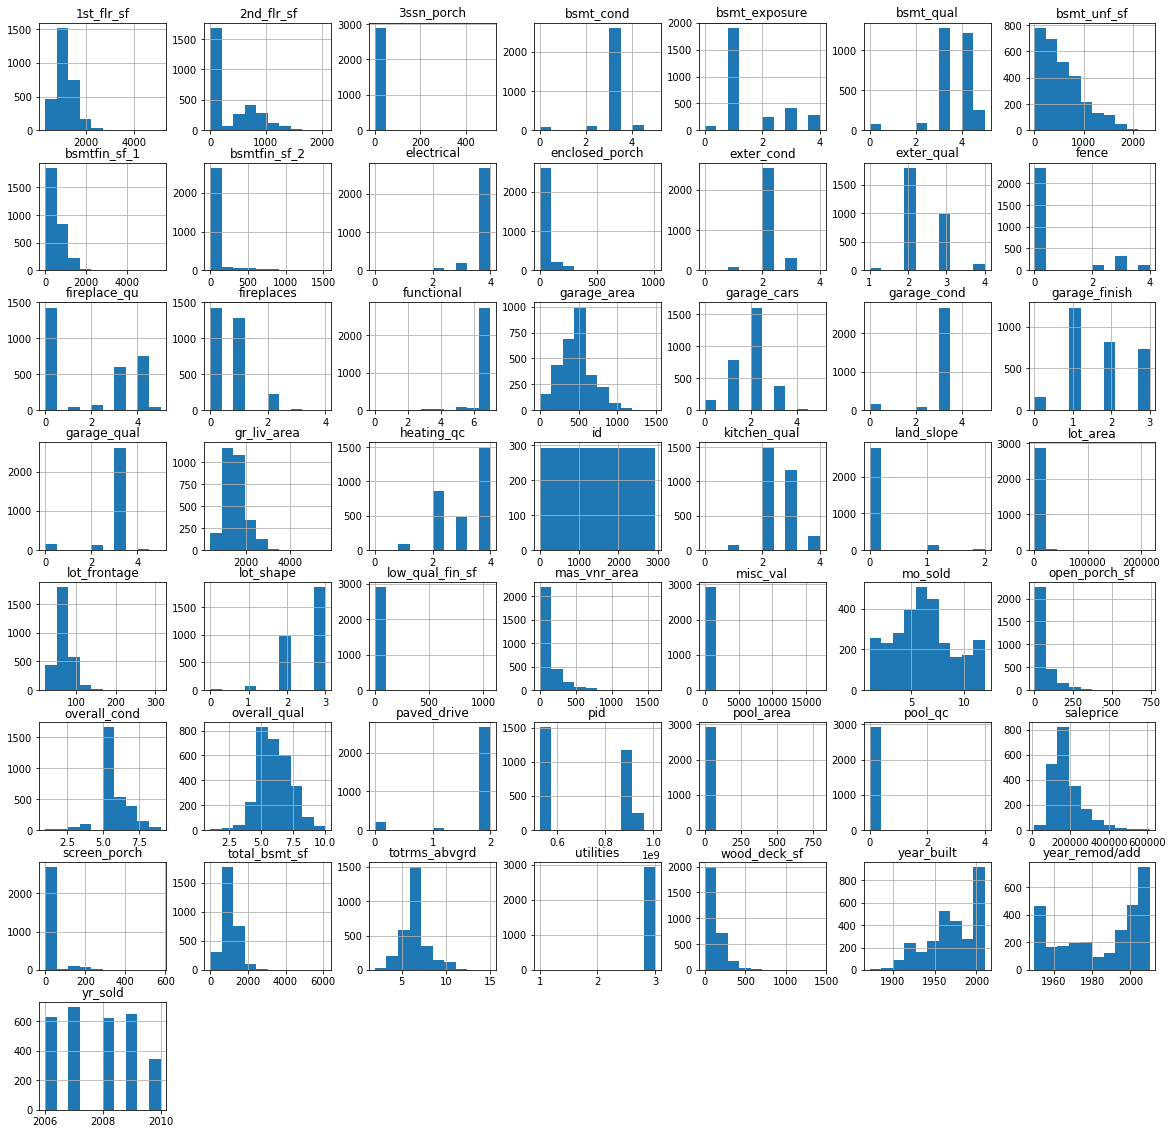

In [102]:
train_test_cleaned_num.hist(figsize=(20, 20));

In [103]:
train_test_cleaned_num.describe().T

count          mean           std          min           25%          50%           75%           max
id               2930.0  1.465500e+03  8.459625e+02          1.0  7.332500e+02       1465.5  2.197750e+03  2.930000e+03
pid              2930.0  7.144645e+08  1.887308e+08  526301100.0  5.284770e+08  535453620.0  9.071811e+08  1.007100e+09
lot_area         2930.0  1.014792e+04  7.880018e+03       1300.0  7.440250e+03       9436.5  1.155525e+04  2.152450e+05
lot_shape        2930.0  2.597611e+00  5.702848e-01          0.0  2.000000e+00          3.0  3.000000e+00  3.000000e+00
utilities        2930.0  2.998635e+00  4.523954e-02          1.0  3.000000e+00          3.0  3.000000e+00  3.000000e+00
land_slope       2930.0  5.358362e-02  2.483042e-01          0.0  0.000000e+00          0.0  0.000000e+00  2.000000e+00
overall_qual     2930.0  6.094881e+00  1.411026e+00          1.0  5.000000e+00          6.0  7.000000e+00  1.000000e+01
overall_cond     2930.0  5.563140e+00  1.111537e+00          1.0  5.000000e+00          5.0  6.000000e+00  9.000000e+00
year_built       2930.0  1.971356e+03  3.024536e+01       1872.0  1.954000e+03       1973.0  2.001000e+03  2.010000e+03
year_remod/add   2930.0  1.984267e+03  2.086029e+01       1950.0  1.965000e+03       1993.0  2.004000e+03  2.010000e+03
exter_qual       2930.0  2.398635e+00  5.803175e-01          1.0  2.000000e+00          2.0  3.000000e+00  4.000000e+00
exter_cond       2930.0  2.085324e+00  3.716980e-01          0.0  2.000000e+00          2.0  2.000000e+00  4.000000e+00
bsmt_qual        2930.0  3.478840e+00  9.042950e-01          0.0  3.000000e+00          4.0  4.000000e+00  5.000000e+00
bsmt_cond        2930.0  2.922867e+00  5.726699e-01          0.0  3.000000e+00          3.0  3.000000e+00  5.000000e+00
bsmt_exposure    2930.0  1.630375e+00  1.074662e+00          0.0  1.000000e+00          1.0  2.000000e+00  4.000000e+00
heating_qc       2930.0  3.149488e+00  9.580701e-01          0.0  2.000000e+00          4.0  4.000000e+00  4.000000e+00
electrical       2930.0  3.892150e+00  3.884292e-01          0.0  4.000000e+00          4.0  4.000000e+00  4.000000e+00
1st_flr_sf       2930.0  1.159558e+03  3.918909e+02        334.0  8.762500e+02       1084.0  1.384000e+03  5.095000e+03
2nd_flr_sf       2930.0  3.354560e+02  4.283957e+02          0.0  0.000000e+00          0.0  7.037500e+02  2.065000e+03
low_qual_fin_sf  2930.0  4.676792e+00  4.631051e+01          0.0  0.000000e+00          0.0  0.000000e+00  1.064000e+03
gr_liv_area      2930.0  1.499690e+03  5.055089e+02        334.0  1.126000e+03       1442.0  1.742750e+03  5.642000e+03
kitchen_qual     2930.0  2.511263e+00  6.631624e-01          0.0  2.000000e+00          2.0  3.000000e+00  4.000000e+00
totrms_abvgrd    2930.0  6.443003e+00  1.572964e+00          2.0  5.000000e+00          6.0  7.000000e+00  1.500000e+01
functional       2930.0  6.844027e+00  6.630574e-01          0.0  7.000000e+00          7.0  7.000000e+00  7.000000e+00
fireplaces       2930.0  5.993174e-01  6.479209e-01          0.0  0.000000e+00          1.0  1.000000e+00  4.000000e+00
fireplace_qu     2930.0  1.770307e+00  1.804968e+00          0.0  0.000000e+00          1.0  4.000000e+00  5.000000e+00
garage_finish    2930.0  1.719795e+00  8.985691e-01          0.0  1.000000e+00          2.0  2.000000e+00  3.000000e+00
garage_qual      2930.0  2.801706e+00  7.146211e-01          0.0  3.000000e+00          3.0  3.000000e+00  5.000000e+00
garage_cond      2930.0  2.809556e+00  7.112548e-01          0.0  3.000000e+00          3.0  3.000000e+00  5.000000e+00
paved_drive      2930.0  1.831399e+00  5.363888e-01          0.0  2.000000e+00          2.0  2.000000e+00  2.000000e+00
wood_deck_sf     2930.0  9.375188e+01  1.263616e+02          0.0  0.000000e+00          0.0  1.680000e+02  1.424000e+03
open_porch_sf    2930.0  4.753345e+01  6.748340e+01          0.0  0.000000e+00         27.0  7.000000e+01  7.420000e+02
enclosed_porch   2930.0  2.301160e+01  6.413906e+01       

In [104]:
def outlier(x,y):
    t=x.dropna()
    skew_value=skew(t)
    y=np.log1p(y)
    print('sample length: %s  and skew: %s'%(len(x),skew_value))
    fig,axs=plt.subplots(1,2,figsize=(8,3))
    sns.boxplot(x,orient='v',ax=axs[0])
    sns.regplot(x,y,ax=axs[1])
    plt.tight_layout()

sample length: 2930  and skew: 1.6693484287391456


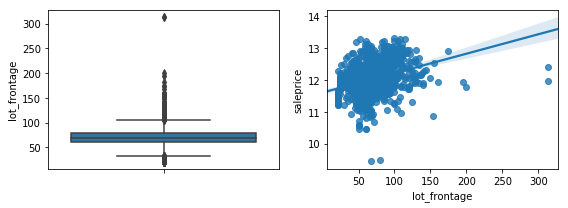

In [105]:
outlier(train_test_cleaned.lot_frontage, train_test_cleaned.saleprice)

In [106]:
train_test_cleaned=train_test_cleaned[train_test_cleaned.lot_frontage<250]

sample length: 2928  and skew: 0.1874021893769163


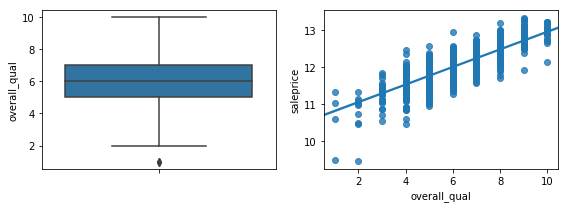

In [107]:
outlier(train_test_cleaned.overall_qual, train_test_cleaned.saleprice)

sample length: 2928  and skew: 0.574618353370937


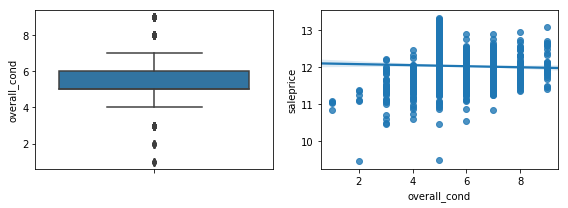

In [108]:
outlier(train_test_cleaned.overall_cond, train_test_cleaned.saleprice)

sample length: 2928  and skew: 1.281647807676348


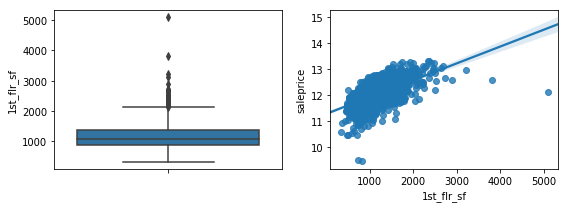

In [109]:
outlier(train_test_cleaned['1st_flr_sf'], train_test_cleaned.saleprice)

In [110]:
train_test_cleaned=train_test_cleaned[train_test_cleaned['1st_flr_sf']<3500]

sample length: 2926  and skew: 0.8656973305516446


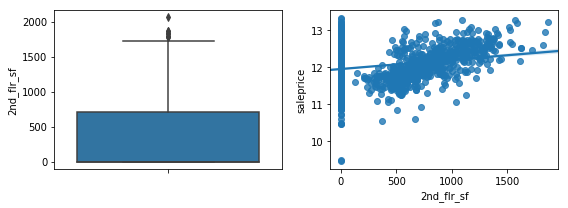

In [111]:
outlier(train_test_cleaned['2nd_flr_sf'], train_test_cleaned.saleprice)

sample length: 2926  and skew: 12.10352713514722


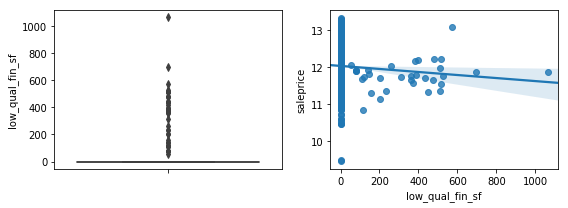

In [112]:
outlier(train_test_cleaned.low_qual_fin_sf, train_test_cleaned.saleprice)

In [113]:
train_test_cleaned=train_test_cleaned[train_test_cleaned.low_qual_fin_sf<800]

sample length: 2925  and skew: 1.02294182114007


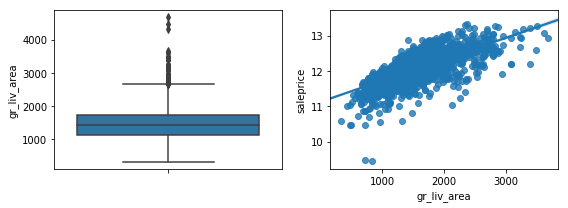

In [114]:
outlier(train_test_cleaned.gr_liv_area, train_test_cleaned.saleprice)

In [115]:
train_test_cleaned=train_test_cleaned[train_test_cleaned.gr_liv_area<3800]

sample length: 2922  and skew: 1.8460889704237835


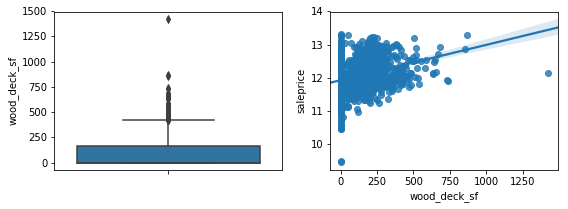

In [116]:
outlier(train_test_cleaned.wood_deck_sf, train_test_cleaned.saleprice)

In [117]:
train_test_cleaned=train_test_cleaned[train_test_cleaned.wood_deck_sf<1250]

sample length: 2921  and skew: 4.006744138003463


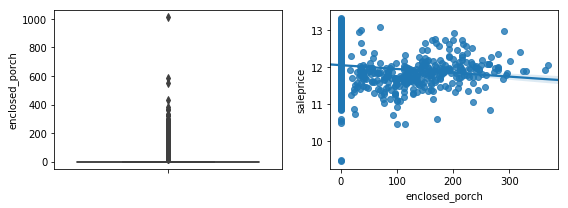

In [118]:
outlier(train_test_cleaned.enclosed_porch, train_test_cleaned.saleprice)

In [119]:
train_test_cleaned=train_test_cleaned[train_test_cleaned.enclosed_porch<800]

sample length: 2920  and skew: 2.4923044001147936


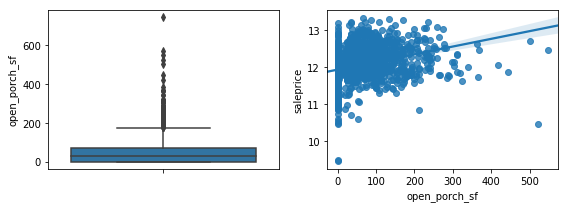

In [120]:
outlier(train_test_cleaned.open_porch_sf, train_test_cleaned.saleprice)

In [121]:
train_test_cleaned=train_test_cleaned[train_test_cleaned.enclosed_porch<600]

sample length: 2920  and skew: 11.378056534498107


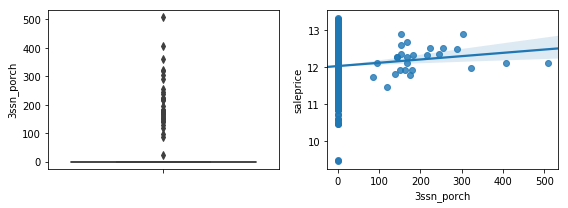

In [122]:
outlier(train_test_cleaned['3ssn_porch'], train_test_cleaned.saleprice)

In [123]:
train_test_cleaned=train_test_cleaned[train_test_cleaned['3ssn_porch']<450]

sample length: 2919  and skew: 3.9466937029936977


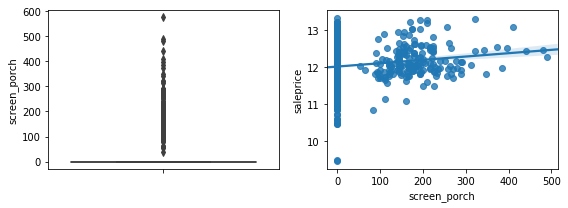

In [124]:
outlier(train_test_cleaned.screen_porch, train_test_cleaned.saleprice)

In [125]:
train_test_cleaned=train_test_cleaned[train_test_cleaned.screen_porch<550]

sample length: 2918  and skew: 0.7683109211834466


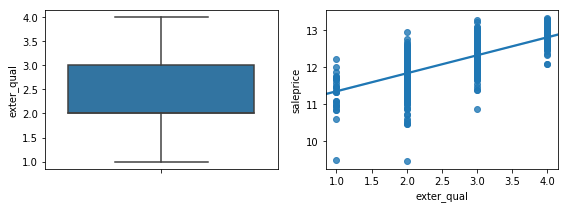

In [126]:
outlier(train_test_cleaned.exter_qual, train_test_cleaned.saleprice)

sample length: 2918  and skew: 1.315491338556648


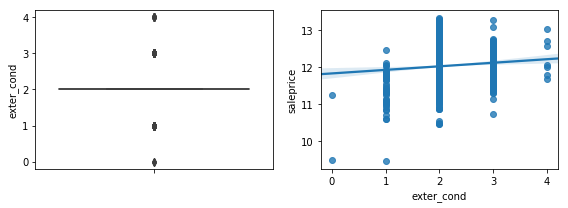

In [127]:
outlier(train_test_cleaned.exter_cond, train_test_cleaned.saleprice)

sample length: 2918  and skew: -0.5436343180993581


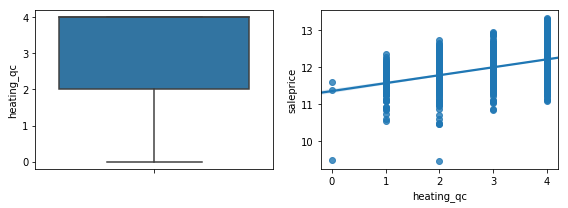

In [128]:
outlier(train_test_cleaned.heating_qc, train_test_cleaned.saleprice)

sample length: 2918  and skew: -4.2027399251730655


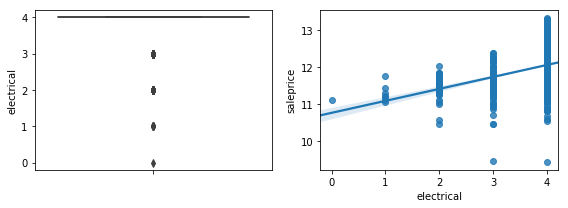

In [129]:
outlier(train_test_cleaned.electrical, train_test_cleaned.saleprice)

sample length: 2918  and skew: 2.572371794171401


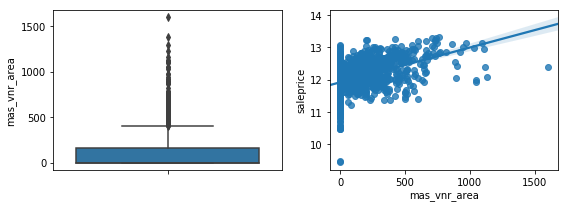

In [130]:
outlier(train_test_cleaned.mas_vnr_area, train_test_cleaned.saleprice)

In [131]:
train_test_cleaned=train_test_cleaned[train_test_cleaned.mas_vnr_area<1500]

sample length: 2917  and skew: 0.8227267220254774


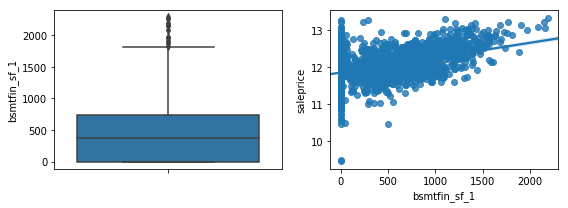

In [132]:
outlier(train_test_cleaned.bsmtfin_sf_1, train_test_cleaned.saleprice)

sample length: 2917  and skew: 4.128058720003511


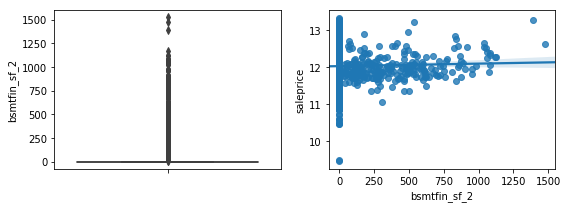

In [133]:
outlier(train_test_cleaned.bsmtfin_sf_2, train_test_cleaned.saleprice)

In [134]:
train_test_cleaned=train_test_cleaned[train_test_cleaned.bsmtfin_sf_2<1250]

sample length: 2914  and skew: 0.9261844248449301


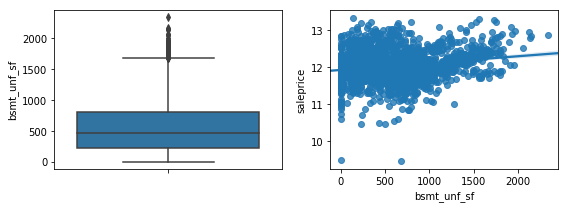

In [135]:
outlier(train_test_cleaned.bsmt_unf_sf, train_test_cleaned.saleprice)

sample length: 2914  and skew: 0.4015022969799625


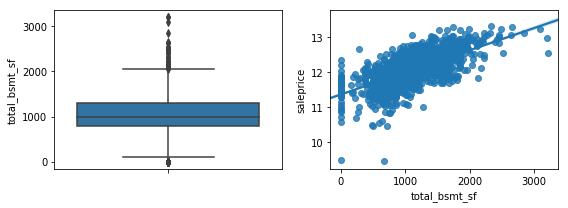

In [136]:
outlier(train_test_cleaned.total_bsmt_sf, train_test_cleaned.saleprice)

In [137]:
train_test_cleaned=train_test_cleaned[train_test_cleaned.total_bsmt_sf<4000]

sample length: 2914  and skew: -0.6005174254730364


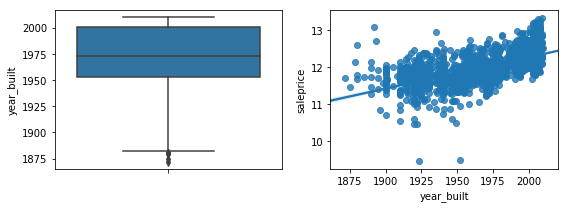

In [138]:
outlier(train_test_cleaned.year_built, train_test_cleaned.saleprice)

sample length: 2914  and skew: 0.13273642183891096


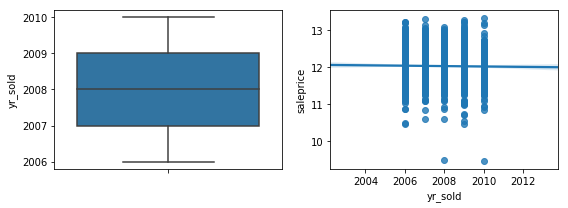

In [139]:
outlier(train_test_cleaned.yr_sold, train_test_cleaned.saleprice)

sample length: 2914  and skew: 0.21278503464579943


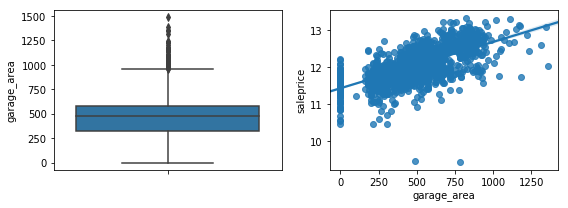

In [140]:
outlier(train_test_cleaned.garage_area, train_test_cleaned.saleprice)

sample length: 2914  and skew: -0.4480967080836636


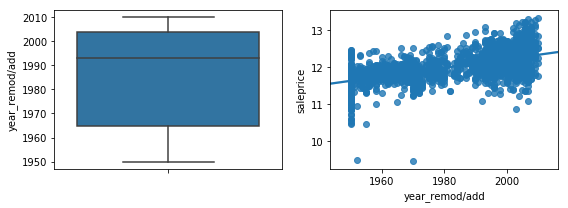

In [141]:
outlier(train_test_cleaned['year_remod/add'], train_test_cleaned.saleprice)

In [142]:
train_test_cleaned_int = train_test_cleaned.select_dtypes(include = int)
train_test_cleaned_flt1 = train_test_cleaned_int.astype(float)
train_test_cleaned_flt = train_test_cleaned.select_dtypes(include = float)
train_test_cleaned_num = pd.concat([train_test_cleaned_flt1, train_test_cleaned_flt], sort=False, axis=1)

#### Checking for multicollinearity

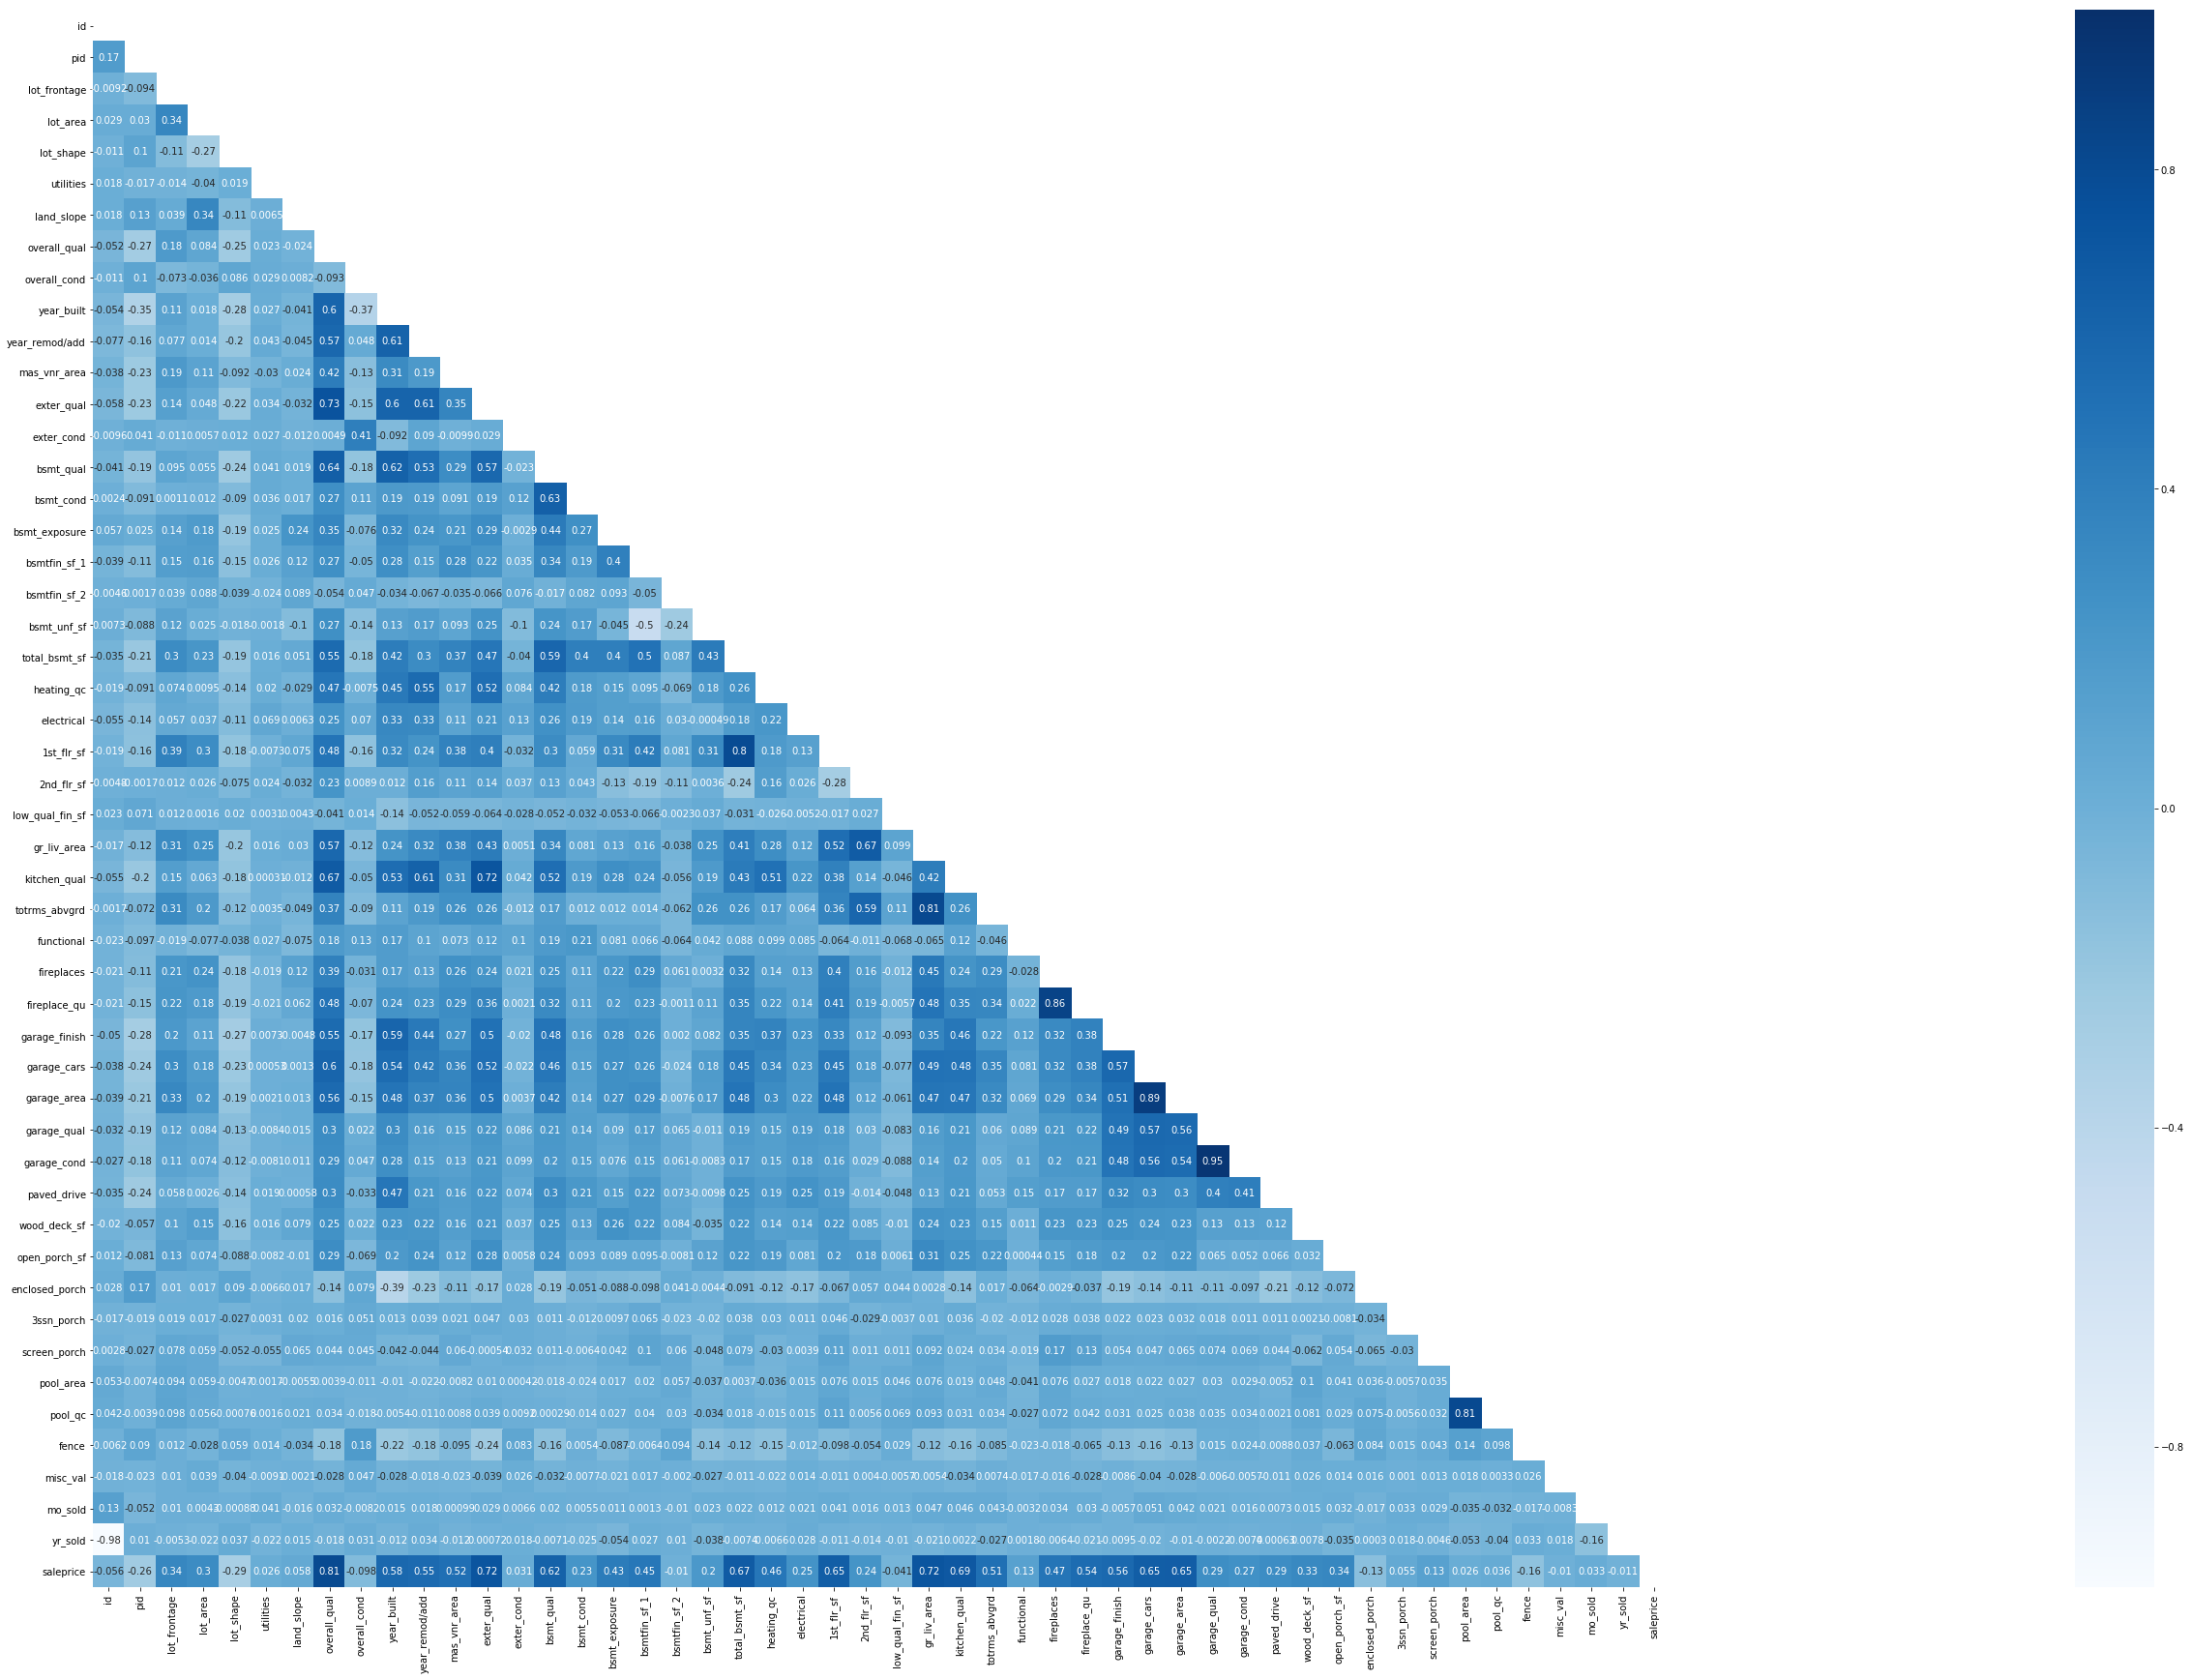

In [143]:
plt.figure(figsize=(150,30))
mask = np.zeros_like(train_test_cleaned.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_test_cleaned.corr(), mask=mask, annot=True, square=True, cmap='Blues')

#### Human feature selection 

The following are dropped as:
    - to prevent multicollinearity from forming in our model 
    - little to no correlation with our target
    - does not add significant value to our model

##### Multicollinearity

In [144]:
train_test_cleaned.drop('1st_flr_sf', axis=1, inplace=True)
train_test_cleaned.drop('2nd_flr_sf', axis=1, inplace=True)
# total_bsmt_sf can explain saleprice better
train_test_cleaned.drop('totrms_abvgrd', axis=1, inplace=True) # gr_liv_area can explain saleprice better
train_test_cleaned.drop('exter_qual', axis=1, inplace=True) #overall_qual can explain saleprice better
train_test_cleaned.drop('garage_cars', axis=1, inplace=True) 
#garage_area shows the total square feet of a particular garage

##### Little to no correlation

In [145]:
train_test_cleaned.drop('pid', axis=1, inplace=True)
train_test_cleaned.drop('utilities', axis=1, inplace=True)
train_test_cleaned.drop('land_slope', axis=1, inplace=True)
train_test_cleaned.drop('functional', axis=1, inplace=True) 
train_test_cleaned.drop('overall_cond', axis=1, inplace=True)
train_test_cleaned.drop('exter_cond', axis=1, inplace=True)
train_test_cleaned.drop('low_qual_fin_sf', axis=1, inplace=True)
train_test_cleaned.drop('misc_val', axis=1, inplace=True)
train_test_cleaned.drop('mo_sold', axis=1, inplace=True) 
train_test_cleaned.drop('fence', axis=1, inplace=True) 

##### Not significant to model

In [146]:
train_test_cleaned.drop('bsmtfin_sf_1', axis=1, inplace=True)
train_test_cleaned.drop('bsmtfin_sf_2', axis=1, inplace=True) 
train_test_cleaned.drop('bsmt_unf_sf', axis=1, inplace=True) 
#total_bsmt_sf includes these three variables

train_test_cleaned.drop('misc_feature', axis=1, inplace=True) 
#since misc_val does not add value to our target, there is no point keeping misc_feature

train_test_cleaned.drop('street', axis=1, inplace=True) 
train_test_cleaned.drop('alley', axis=1, inplace=True) 
train_test_cleaned.drop('land_contour', axis=1, inplace=True) 
train_test_cleaned.drop('lot_config', axis=1, inplace=True) 

train_test_cleaned.drop('condition_1', axis=1, inplace=True) 
train_test_cleaned.drop('exterior_1st', axis=1, inplace=True) 
#looking for >=2 conditions may affect saleprice more

train_test_cleaned.drop('mas_vnr_type', axis=1, inplace=True) 
train_test_cleaned.drop('foundation', axis=1, inplace=True) 
train_test_cleaned.drop('roof_matl', axis=1, inplace=True) 
#can be easily replaced once bought over

train_test_cleaned.drop('garage_yr_blt', axis=1, inplace=True) 
#garage_cond and garage_qual can be a better gauge to show how the overall condition of the garage is

#### Feature Engineering

- Features that have very little/high correlation to saleprice/other features and were NOT dropped are used in feature engineering to determine if correlation can be improved

In [147]:
train_test_cleaned['prop_age'] = train_test_cleaned['yr_sold'] - train_test_cleaned['year_built']
train_test_cleaned.drop('yr_sold', axis=1, inplace=True) 
train_test_cleaned.drop('year_built', axis=1, inplace=True) 
# to determine whether age of house will affect sale price

In [148]:
train_test_cleaned['pool'] = train_test_cleaned['pool_area'] * train_test_cleaned['pool_qc']
train_test_cleaned.drop('pool_area', axis=1, inplace=True) 
train_test_cleaned.drop('pool_qc', axis=1, inplace=True) 
# to determine whether the pool feature will affect sale price

In [149]:
train_test_cleaned['bsmt'] = train_test_cleaned['bsmt_qual'] * train_test_cleaned['bsmt_cond']
train_test_cleaned.drop('bsmt_qual', axis=1, inplace=True) 
train_test_cleaned.drop('bsmt_cond', axis=1, inplace=True) 
# to determine whether the basement quality and condition will affect sale price

In [150]:
train_test_cleaned['fireplace'] = train_test_cleaned['fireplaces'] * train_test_cleaned['fireplace_qu']
train_test_cleaned.drop('fireplaces', axis=1, inplace=True) 
train_test_cleaned.drop('fireplace_qu', axis=1, inplace=True) 
# to determine whether fireplace will affect sale price

In [151]:
train_test_cleaned['garage_aes'] = train_test_cleaned['garage_finish'] * train_test_cleaned['garage_qual'] * train_test_cleaned['garage_cond']
train_test_cleaned.drop('garage_finish', axis=1, inplace=True)
train_test_cleaned.drop('garage_cond', axis=1, inplace=True)
train_test_cleaned.drop('garage_qual', axis=1, inplace=True) 

In [152]:
train_test_cleaned.describe().T

count           mean           std      min        25%       50%        75%       max
id              2914.0    1464.668497    846.940186      1.0     732.25    1462.5    2199.75    2930.0
lot_frontage    2914.0      68.711050     20.200562     21.0      60.00      68.0      78.00     200.0
lot_area        2914.0   10075.787577   7753.423331   1300.0    7427.75    9399.5   11500.00  215245.0
lot_shape       2914.0       2.600549      0.567769      0.0       2.00       3.0       3.00       3.0
overall_qual    2914.0       6.086822      1.402885      1.0       5.00       6.0       7.00      10.0
year_remod/add  2914.0    1984.231640     20.875488   1950.0    1965.00    1993.0    2004.00    2010.0
mas_vnr_area    2914.0      99.319935    172.897332      0.0       0.00       0.0     162.00    1378.0
bsmt_exposure   2914.0       1.623885      1.068826      0.0       1.00       1.0       2.00       4.0
total_bsmt_sf   2914.0    1045.841455    420.885376      0.0     792.00     988.0    1296.75    3206.0
heating_qc      2914.0       3.147563      0.958197      0.0       2.00       4.0       4.00       4.0
electrical      2914.0       3.891901      0.389067      0.0       4.00       4.0       4.00       4.0
gr_liv_area     2914.0    1491.163349    482.675501    334.0    1124.25    1440.0    1738.00    3672.0
kitchen_qual    2914.0       2.506863      0.660380      0.0       2.00       2.0       3.00       4.0
garage_area     2914.0     471.290323    214.013824      0.0     319.25     478.5     576.00    1488.0
paved_drive     2914.0       1.830817      0.537503      0.0       2.00       2.0       2.00       2.0
wood_deck_sf    2914.0      92.771791    122.895451      0.0       0.00       0.0     168.00     857.0
open_porch_sf   2914.0      47.053535     66.331377      0.0       0.00      26.5      70.00     742.0
enclosed_porch  2914.0      22.642416     61.159961      0.0       0.00       0.0       0.00     584.0
3ssn_porch      2914.0       2.432395     23.405331      0.0       0.00       0.0       0.00     407.0
screen_porch    2914.0      15.752231     55.044722      0.0       0.00       0.0       0.00     490.0
saleprice       2041.0  181130.773150  78843.924949  12789.0  129500.00  162000.0  214000.00  611657.0
prop_age        2914.0      36.497941     30.308906      0.0       7.00      35.0      54.75     136.0
pool            2914.0       4.427934     85.787712      0.0       0.00       0.0       0.00    2400.0
bsmt            2914.0      10.488675      3.040076      0.0       9.00      12.0      12.00      20.0
fireplace       2914.0       2.050789      2.320559      0.0       0.00       1.0       4.00      15.0
garage_aes      2914.0      15.341798      8.499865      0.0       9.00      18.0      24.00      75.0

#### Dummies for nominal data

In [153]:
train_test_c_nom = train_test_cleaned.select_dtypes(include=object)
train_test_c_nom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914 entries, 0 to 2929
Data columns (total 14 columns):
ms_subclass       2914 non-null object
ms_zoning         2914 non-null object
neighborhood      2914 non-null object
condition_2       2914 non-null object
bldg_type         2914 non-null object
house_style       2914 non-null object
roof_style        2914 non-null object
exterior_2nd      2914 non-null object
bsmtfin_type_1    2914 non-null object
bsmtfin_type_2    2914 non-null object
heating           2914 non-null object
central_air       2914 non-null object
garage_type       2914 non-null object
sale_type         2914 non-null object
dtypes: object(14)
memory usage: 341.5+ KB


In [154]:
x = pd.get_dummies(train_test_c_nom, drop_first=True)

In [155]:
x['id'] = train_test_cleaned.id

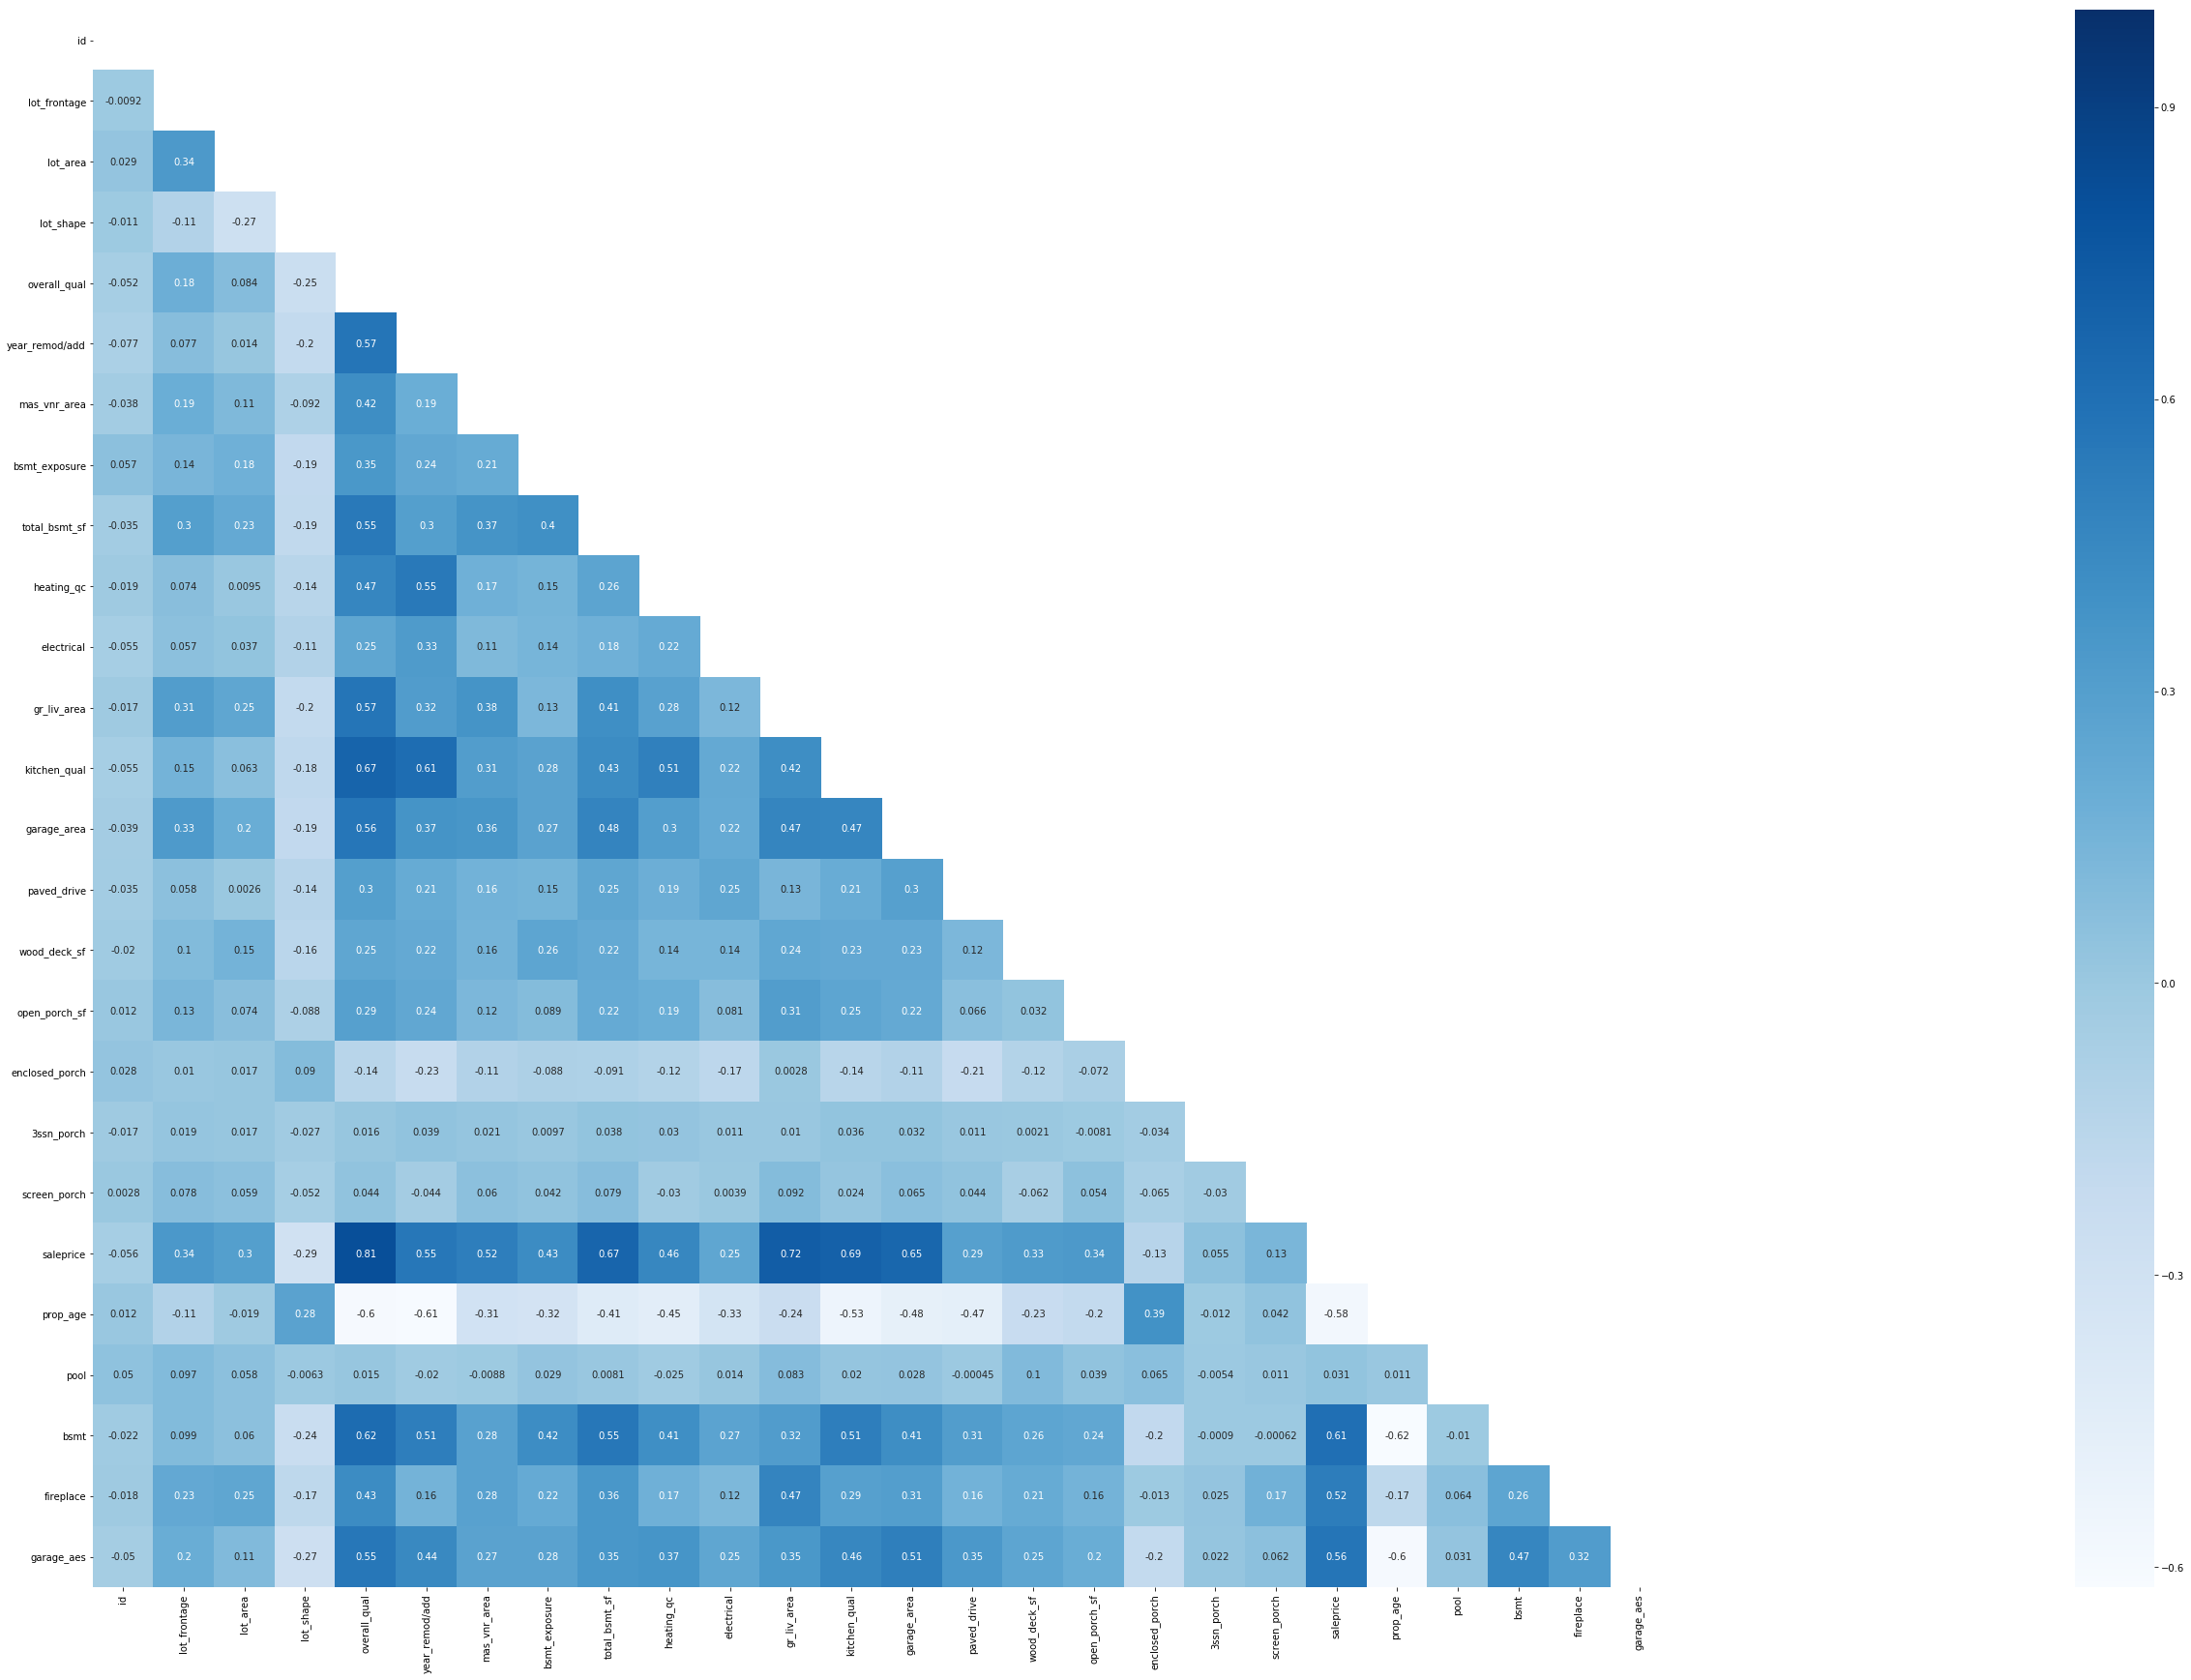

In [156]:
plt.figure(figsize=(150,30))
mask = np.zeros_like(train_test_cleaned.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_test_cleaned.corr(), mask=mask, annot=True, square=True, cmap='Blues')

In [157]:
train_test_cleaned.drop('pool', axis=1, inplace=True) 

In [158]:
train_test_fin = pd.merge(train_test_cleaned, x, how='outer', on='id')

In [159]:
train_test_fin.drop(columns= ['ms_subclass', 'ms_zoning', 'condition_2', 'bldg_type', 'house_style', 
                    'roof_style', 'exterior_2nd', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'central_air', 
                    'garage_type', 'sale_type'], axis=1, inplace=True)

In [160]:
train_test_fin.describe().T


count           mean           std      min        25%       50%        75%       max
id                    2914.0    1464.668497    846.940186      1.0     732.25    1462.5    2199.75    2930.0
lot_frontage          2914.0      68.711050     20.200562     21.0      60.00      68.0      78.00     200.0
lot_area              2914.0   10075.787577   7753.423331   1300.0    7427.75    9399.5   11500.00  215245.0
lot_shape             2914.0       2.600549      0.567769      0.0       2.00       3.0       3.00       3.0
overall_qual          2914.0       6.086822      1.402885      1.0       5.00       6.0       7.00      10.0
year_remod/add        2914.0    1984.231640     20.875488   1950.0    1965.00    1993.0    2004.00    2010.0
mas_vnr_area          2914.0      99.319935    172.897332      0.0       0.00       0.0     162.00    1378.0
bsmt_exposure         2914.0       1.623885      1.068826      0.0       1.00       1.0       2.00       4.0
total_bsmt_sf         2914.0    1045.841455    420.885376      0.0     792.00     988.0    1296.75    3206.0
heating_qc            2914.0       3.147563      0.958197      0.0       2.00       4.0       4.00       4.0
electrical            2914.0       3.891901      0.389067      0.0       4.00       4.0       4.00       4.0
gr_liv_area           2914.0    1491.163349    482.675501    334.0    1124.25    1440.0    1738.00    3672.0
kitchen_qual          2914.0       2.506863      0.660380      0.0       2.00       2.0       3.00       4.0
garage_area           2914.0     471.290323    214.013824      0.0     319.25     478.5     576.00    1488.0
paved_drive           2914.0       1.830817      0.537503      0.0       2.00       2.0       2.00       2.0
wood_deck_sf          2914.0      92.771791    122.895451      0.0       0.00       0.0     168.00     857.0
open_porch_sf         2914.0      47.053535     66.331377      0.0       0.00      26.5      70.00     742.0
enclosed_porch        2914.0      22.642416     61.159961      0.0       0.00       0.0       0.00     584.0
3ssn_porch            2914.0       2.432395     23.405331      0.0       0.00       0.0       0.00     407.0
screen_porch          2914.0      15.752231     55.044722      0.0       0.00       0.0       0.00     490.0
saleprice             2041.0  181130.773150  78843.924949  12789.0  129500.00  162000.0  214000.00  611657.0
prop_age              2914.0      36.497941     30.308906      0.0       7.00      35.0      54.75     136.0
bsmt                  2914.0      10.488675      3.040076      0.0       9.00      12.0      12.00      20.0
fireplace             2914.0       2.050789      2.320559      0.0       0.00       1.0       4.00      15.0
garage_aes            2914.0      15.341798      8.499865      0.0       9.00      18.0      24.00      75.0
ms_subclass_150       2914.0       0.000343      0.018525      0.0       0.00       0.0       0.00       1.0
ms_subclass_160       2914.0       0.044269      0.205728      0.0       0.00       0.0       0.00       1.0
ms_subclass_180       2914.0       0.005834      0.076170      0.0       0.00       0.0       0.00       1.0
ms_subclass_190       2914.0       0.020933      0.143186      0.0       0.00       0.0       0.00       1.0
ms_subclass_20        2914.0       0.368222      0.482405      0.0       0.00       0.0       1.00       1.0
ms_subclass_30        2914.0       0.047701      0.213169      0.0       0.00       0.0       0.00       1.0
ms_subclass_40        2914.0       0.002059      0.045338      0.0       0.00       0.0       0.00       1.0
ms_subclass_45        2914.0       0.006177      0.078365      0.0       0.00       0.0       0.00       1.0
ms_subclass_50        2914.0       0.097804      0.297100      0.0       0.00       0.0       0.00       1.0
ms_subclass_60        2914.0       0.194921      0.396208      0.0       0.00       0.0       0.00       1.0
ms_subclass_70        2914.0       0.043926      0.204965      0.0       0.00       0.0       0.00 

In [161]:
test_final = train_test_fin[train_test_fin.saleprice.isnull()]
test_final = test_final.drop(columns='saleprice', axis=1)

In [162]:
train_nfinal = train_test_fin.dropna()
train_final = train_nfinal.drop(columns='neighborhood', axis=1)

In [163]:
test_final.to_csv('./test_final.csv')
train_final.to_csv('./train_final.csv')

In [164]:
train_final.drop(columns='id', axis=1, inplace=True)

In [165]:
train_final.head()

lot_frontage  lot_area  lot_shape  overall_qual  year_remod/add  mas_vnr_area  bsmt_exposure  total_bsmt_sf  heating_qc  electrical  gr_liv_area  kitchen_qual  garage_area  paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  saleprice  prop_age  bsmt  fireplace  garage_aes  ms_subclass_150  ms_subclass_160  ms_subclass_180  ms_subclass_190  ms_subclass_20  ms_subclass_30  ms_subclass_40  ms_subclass_45  ms_subclass_50  ms_subclass_60  ms_subclass_70  \
0          68.0     13517          2             6            2005         289.0              1          725.0           4           4         1479             3        475.0            2             0             44               0           0             0   130500.0        34     9          0          18                0                0                0                0               0               0               0               0               0               1               0   
1          43.0     11492          2             7            1997         132.0              1          913.0           4           4         2122             3        559.0            2             0             74               0           0             0   220000.0        13    12          3          18                0                0                0                0               0               0               0               0               0               1               0   
2          68.0      7922          3             5            2007           0.0              1         1057.0           2           4         1057             3        246.0            2             0             52               0           0             0   109000.0        57     9          0           9                0                0                0                0               1               0               0               0               0               0               0   
3          73.0      9802          3             5            2007           0.0              1          384.0           3           4         1444             2        400.0            2           100              0               0           0             0   174000.0         4    12          0          27                0                0                0                0               0               0               0               0               0               1               0   
4          82.0     14235          2             6            1993           0.0              1          676.0           2           4         1445             2        484.0            0             0             59               0           0             0   138500.0       110     8          0           9                0                0                0                0               0               0               0               0               1               0               0   

   ms_subclass_75  ms_subclass_80  ms_subclass_85  ms_subclass_90  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  neighborhood_Blueste  neighborhood_BrDale  neighborhood_BrkSide  neighborhood_ClearCr  neighborhood_CollgCr  neighborhood_Crawfor  neighborhood_Edwards  neighborhood_Gilbert  neighborhood_Greens  neighborhood_GrnHill  neighborhood_IDOTRR  neighborhood_Landmrk  neighborhood_MeadowV  neighborhood_Mitchel  neighborhood_NAmes  ...  \
0               0               0               0               0                  0             0                  0             0             1             0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                    0                     0                     0                     0                   0  ...   
1               0               0               0               

### Modelling and Prediction

In [166]:
features = [col for col in train_final if col != 'saleprice']
X = train_final[features]
y = train_final['saleprice']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [168]:
ss = StandardScaler() 
X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test)
pd.DataFrame(X_train, columns=features).head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


lot_frontage  lot_area  lot_shape  overall_qual  year_remod/add  mas_vnr_area  bsmt_exposure  total_bsmt_sf  heating_qc  electrical  gr_liv_area  kitchen_qual  garage_area  paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  prop_age      bsmt  fireplace  garage_aes  ms_subclass_150  ms_subclass_160  ms_subclass_180  ms_subclass_190  ms_subclass_20  ms_subclass_30  ms_subclass_40  ms_subclass_45  ms_subclass_50  ms_subclass_60  ms_subclass_70  ms_subclass_75  \
0     -0.054035  0.481737  -1.064102     -1.489160       -1.146659     -0.573658      -0.573464       0.096284   -1.202853    0.278923    -0.823954     -0.774743    -0.750749     0.315788      2.099448      -0.711995       -0.375118   -0.095277     -0.281915  0.400495 -0.499870  -0.453224    0.297547              0.0        -0.202031        -0.067795        -0.153008        1.267467       -0.228625       -0.044324       -0.062746       -0.333333       -0.483602       -0.208941       -0.088911   
1     -0.054035  0.374941  -1.064102      1.324566        0.508826      2.211465       1.307351       0.425793    0.862652    0.278923     2.135785      0.729517     1.283647     0.315788      0.787543       0.615887       -0.375118   -0.095277     -0.281915 -0.751181  0.456929   0.435792    0.297547              0.0        -0.202031        -0.067795        -0.153008       -0.788975       -0.228625       -0.044324       -0.062746       -0.333333        2.067816       -0.208941       -0.088911   
2     -0.461296 -0.009262   0.726960     -0.082297       -1.619655     -0.573658      -0.573464      -0.650914   -1.202853    0.278923    -0.002157     -0.774743    -1.084408     0.315788      1.938478      -0.711995       -0.375118   -0.095277     -0.281915  1.091500 -0.499870   0.880300   -0.759527              0.0        -0.202031        -0.067795        -0.153008       -0.788975       -0.228625       -0.044324       -0.062746        3.000000       -0.483602       -0.208941       -0.088911   
3     -0.563111 -0.662349   0.726960      0.621135       -0.673664     -0.573658      -0.573464      -0.804066   -0.170100    0.278923    -0.131025     -0.774743     0.472669     0.315788      1.367035      -0.711995        1.043077   -0.095277     -0.281915  2.308986 -0.499870  -0.897732    1.354620              0.0        -0.202031        -0.067795        -0.153008       -0.788975       -0.228625       -0.044324       -0.062746       -0.333333       -0.483602        4.786047       -0.088911   
4     -0.054035  0.929942  -2.855164      1.324566        0.887223      0.860740       2.247758       1.669576    0.862652    0.278923     0.625283      0.729517     1.116817     0.315788      0.707058      -0.177789       -0.375118   -0.095277     -0.281915 -0.981516  1.413727   0.880300    0.297547              0.0        -0.202031        -0.067795        -0.153008        1.267467       -0.228625       -0.044324       -0.062746       -0.333333       -0.483602       -0.208941       -0.088911   

   ms_subclass_80  ms_subclass_85  ms_subclass_90  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  neighborhood_Blueste  neighborhood_BrDale  neighborhood_BrkSide  neighborhood_ClearCr  neighborhood_CollgCr  neighborhood_Crawfor  neighborhood_Edwards  neighborhood_Gilbert  neighborhood_Greens  neighborhood_GrnHill  neighborhood_IDOTRR  neighborhood_Landmrk  neighborhood_MeadowV  neighborhood_Mitchel  neighborhood_NAmes  neighborhood_NPkVill  ...  \
0        -0.20551       -0.120784       -0.194915          -0.096098     -0.231774          -0.025574     -0.085098      0.523391     -0.413061             -0.044324            -0.081111             -0.196714             -0.109109             -0.306004             -0.200272             -0.271448                 -0.25            -0.036179             -0.036179             -0.18943             -0.025574                -0.106             -0.208941            2.402064             -0.099504  ...  

#### LR baseline

In [169]:
lr = LinearRegression()
lr = LinearRegression()

lr.fit(X_train, y_train)
cross_val_score(lr, X_train, y_train, cv=3) 

array([-3.68382905e+22, -1.71957763e+21, -1.38792686e+18])

In [170]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(1530, 145)
(511, 145)
(511,)


lr train r^2 :  0.9143953865536627
lr test r^2 :  -3.4551126756856023e+18


Text(0.5, 0, 'linear_regression_residual')

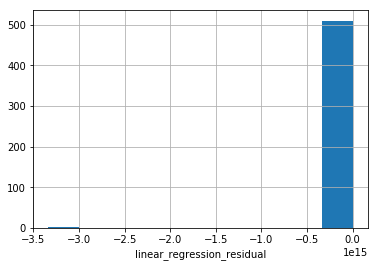

In [171]:
print('lr train r^2 : ', lr.score(X_train, y_train))
print('lr test r^2 : ', lr.score(X_test, y_test))

predictions = lr.predict(X_test)
lr_res = y_test - predictions
lr_res.hist()
plt.xlabel('linear_regression_residual')

#### LASSO Model

In [172]:
features = [col for col in train_final if col != 'saleprice']
X_overfit= train_final[features]
y_overfit = train_final['saleprice']

X_train_overfit, X_test_overfit, y_train_overfit, y_test_overfit = train_test_split(X_overfit, y_overfit, random_state=42)

ss = StandardScaler() 
X_train_overfit = ss.fit_transform(X_train_overfit) 
X_test_overfit = ss.transform(X_test_overfit)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


lasso cross_val_score 0.8873154102628314
lasso train r2 = 0.9097766863426118
lasso test r2 = 0.8977796806873254


Text(0.5, 0, 'lasso_overfit_residuals')

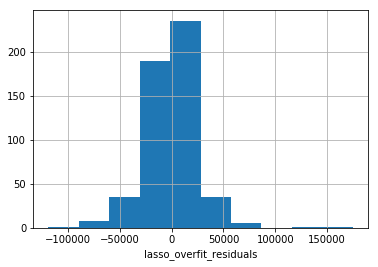

In [173]:

lasso_overfit = LassoCV(cv=3)

print("lasso cross_val_score", cross_val_score(lasso_overfit, X_train_overfit, y_train_overfit, cv=3).mean())

lasso_overfit.fit(X_train_overfit, y_train_overfit)

print('lasso train r2 =', lasso_overfit.score(X_train_overfit, y_train_overfit))

print('lasso test r2 =', lasso_overfit.score(X_test_overfit, y_test_overfit))

lasso_overfit_predict = lasso_overfit.predict(X_test_overfit)

lasso_residuals = y_test_overfit - lasso_overfit_predict

lasso_residuals.hist()
plt.xlabel('lasso_overfit_residuals')

In [174]:
# find features with highest coefficients from lasso overfit
lasso_features = pd.DataFrame(X_overfit.columns, columns=['feature'])
lasso_features['coef'] = lasso_overfit.coef_
lasso_features['abs_coef'] = np.abs(lasso_overfit.coef_)
lasso_features.sort_values(by='abs_coef', ascending=False).head(20)

feature          coef      abs_coef
10            gr_liv_area  21632.324212  21632.324212
3            overall_qual  14111.230541  14111.230541
7           total_bsmt_sf   7442.194134   7442.194134
11           kitchen_qual   7404.601806   7404.601806
68   neighborhood_StoneBr   7305.919426   7305.919426
62   neighborhood_NridgHt   7224.541642   7224.541642
141         sale_type_New   5773.087145   5773.087145
12            garage_area   5689.805561   5689.805561
1                lot_area   5438.696371   5438.696371
6           bsmt_exposure   5396.674883   5396.674883
110      bsmtfin_type_1_1  -5306.683610   5306.683610
5            mas_vnr_area   4646.846931   4646.846931
81       bldg_type_TwnhsE  -4494.977510   4494.977510
21              fireplace   4380.320088   4380.320088
53   neighborhood_GrnHill   4161.374404   4161.374404
19               prop_age  -3741.748933   3741.748933
4          year_remod/add   3680.705623   3680.705623
61   neighborhood_NoRidge   3459.440677   3459.440677
18           screen_porch   3180.541900   3180.541900
115      bsmtfin_type_1_6   2936.976221   2936.976221

In [175]:
hicoef_feat = ['gr_liv_area', 'overall_qual', 'total_bsmt_sf', 'kitchen_qual','neighborhood_StoneBr'  ,'neighborhood_NridgHt',
              'sale_type_New', 'garage_area','lot_area','bsmt_exposure','bsmtfin_type_1_1','mas_vnr_area','fireplace'
              ,'bldg_type_TwnhsE','neighborhood_GrnHill',
              'prop_age','year_remod/add','neighborhood_NoRidge','screen_porch','bsmtfin_type_1_6']


In [176]:
X = train_final[hicoef_feat]
y = train_final['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ss = StandardScaler() 
X_train_sc = ss.fit_transform(X_train) 
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


lasso cross_val_score 0.8818576418424895
lasso train r2 = 0.894691286721685
lasso test r2 = 0.8812449572048113


Text(0.5, 0, 'lasso_residuals')

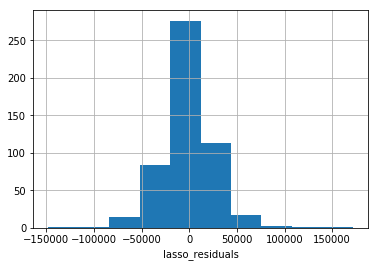

In [177]:
lasso = LassoCV(cv=3)
print("lasso cross_val_score", cross_val_score(lasso, X_train_sc, y_train, cv=3).mean())

lasso.fit(X_train_sc, y_train)

print('lasso train r2 =', lasso.score(X_train_sc, y_train))
print('lasso test r2 =', lasso.score(X_test_sc, y_test))

lasso_predict = lasso.predict(X_test_sc)

lasso_residuals = y_test - lasso_predict

lasso_residuals.hist()
plt.xlabel('lasso_residuals')

In [178]:
lasso_features = pd.DataFrame(X_train.columns, columns=['hicoef_feat'])
lasso_features['coef'] = lasso.coef_
lasso_features['abs_coef'] = np.abs(lasso.coef_)
lasso_features.sort_values(by='abs_coef', ascending=False)

hicoef_feat          coef      abs_coef
0            gr_liv_area  20304.006173  20304.006173
1           overall_qual  14958.072904  14958.072904
2          total_bsmt_sf  10196.499525  10196.499525
3           kitchen_qual   9209.039738   9209.039738
4   neighborhood_StoneBr   7757.523241   7757.523241
5   neighborhood_NridgHt   7244.252229   7244.252229
6          sale_type_New   7235.964356   7235.964356
12             fireplace   6195.123703   6195.123703
8               lot_area   6053.471435   6053.471435
9          bsmt_exposure   5441.396690   5441.396690
16        year_remod/add   5274.558507   5274.558507
7            garage_area   5142.318047   5142.318047
10      bsmtfin_type_1_1  -4775.903532   4775.903532
11          mas_vnr_area   4249.705304   4249.705304
13      bldg_type_TwnhsE  -4139.467902   4139.467902
14  neighborhood_GrnHill   4124.010083   4124.010083
17  neighborhood_NoRidge   4059.039555   4059.039555
19      bsmtfin_type_1_6   3873.059213   3873.059213
15              prop_age  -3354.266357   3354.266357
18          screen_porch   3202.005867   3202.005867

#### Ridge Model

In [179]:
r_alphas = np.logspace(0, 5, 200)

ridge = RidgeCV(alphas=r_alphas)
ridge_overfit = RidgeCV(alphas=r_alphas)

ridge_overfit cross_val_score 0.8881259319608749
ridge_overfit train r2 = 0.9117719475704809
ridge_overfit test r2 = 0.8967200574808293


Text(0.5, 0, 'ridge_overfit_residuals')

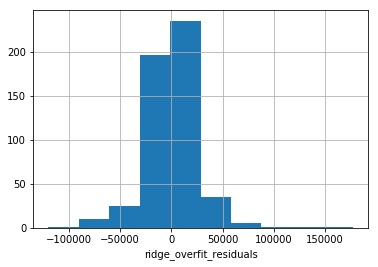

In [180]:
print("ridge_overfit cross_val_score", cross_val_score(ridge_overfit, X_train_overfit, y_train_overfit, cv=3).mean())

ridge_overfit.fit(X_train_overfit, y_train_overfit)

print('ridge_overfit train r2 =', ridge_overfit.score(X_train_overfit, y_train_overfit))

print('ridge_overfit test r2 =', ridge_overfit.score(X_test_overfit, y_test_overfit))

ridge_overfit_predict = ridge_overfit.predict(X_test_overfit)

ridge_overfit_residuals = y_test_overfit - ridge_overfit_predict

ridge_overfit_residuals.hist()
plt.xlabel('ridge_overfit_residuals')

ridge cross_val_score 0.8823937461293929
ridge train r2 = 0.8946476178144889
ridge test r2 = 0.8810200182431523


Text(0.5, 0, 'ridge_residuals')

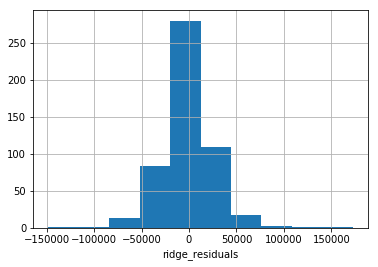

In [181]:
print("ridge cross_val_score", cross_val_score(ridge, X_train_sc, y_train, cv=3).mean())

ridge.fit(X_train_sc, y_train)

print('ridge train r2 =', ridge.score(X_train_sc, y_train))

print('ridge test r2 =', ridge.score(X_test_sc, y_test))

ridge_predict = ridge.predict(X_test_sc)

ridge_residuals = y_test - ridge_predict

ridge_residuals.hist()
plt.xlabel('ridge_residuals')

### Applying model

In [182]:
test_subset = test_final[hicoef_feat]

ss_final = StandardScaler()
ss_final.fit(test_subset)
test_final_sc = ss_final.transform(test_subset)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [183]:
predict = lasso.predict(test_final_sc)
final_submit = pd.DataFrame({
    'id': test_final['id'],
    'saleprice':predict
})

In [184]:
final_submit.head()

id      saleprice
2041  2658  135328.153986
2042  2718  181775.190439
2043  2414  241946.052017
2044  1989  113488.821877
2045   625  196056.390103

In [185]:
final_submit.to_csv('../datasets/final_submission.csv', index=False)

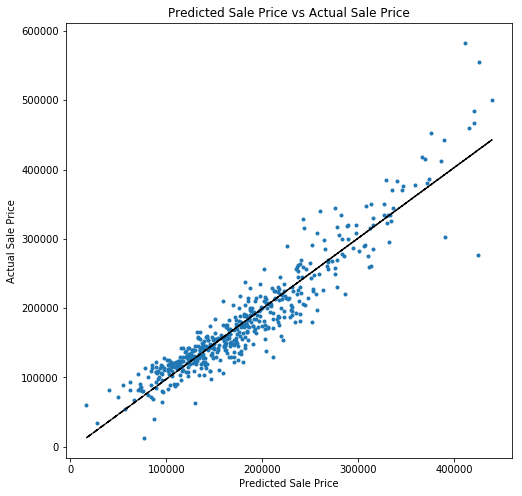

In [188]:
plt.figure(figsize=(8,8))
m,b = np.polyfit(x=lasso_predict, y=y_test, deg=1)
plt.plot(lasso_predict, y_test, '.')
plt.plot(lasso_predict, b + m * lasso_predict, '--', color='k')
frame1 = plt.gca()
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_yaxis().set_ticks([])
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.title('Predicted Sale Price vs Actual Sale Price')
plt.savefig('../images/model_predict_vs_actual.png')

Text(0, 0.5, 'Actual Sale Price')

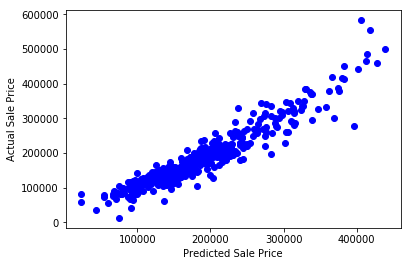

In [189]:
plt.scatter(x=ridge_overfit_predict, y=y_test, c='b')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')

## Business Recommendations
- Which features appear to add the most value to a home?
    1. Gr Liv Area
    2. Overall Qual
    3. Total Basement SF
    4. Kitchen Quality
- Which features hurt the value of a home the most?
    1. No basement (bsmtfin_type_1_1)
    2. Townhouse End Unit (bldg_type_TwnhsE)
    3. Age of property (prop_age)
- What are things that homeowners could improve in their homes to increase the value?
    1. Improve on quality and conditions of high coefficient features to increase value of house
- What neighborhoods seem like they might be a good investment?
    1. Stone Brook
    2. Northridge Heights
    3. Green Hills
    4. Northridge
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?
    1. Other cities may differ demographically. This suggest that not all cities will share the same feature(s) or quality/condition of feature(s) that wealthier / more expensive cities share. To make our model more comparable, we might want to understand the GNI of each city and model our data to generalise across cities.